# <center>Text Mining and Sentiment Analysis for NYC Airbnb Reviews</center>

## <span>Table of Contents</span>

* [1. Introduction](#introduction)
* [2. Prepare](#prepare)
    * [2.1 Loading the libraries](#loading)
    * [2.2 Importing the data](#importing)   
    * [2.3 Exploring the data](#exploring)
* [3. Process](#process)
    * [3.1 Data cleaning and manipulation](#cleaning)
* [4. Analyzing the data](#analyzing)
    * [4.1 Language identification](#language)
    * [4.2 Trend in number of reviews](#review_trend)
* [5. Text mining](#mining)
    * [5.1 Most common words](#words)
    * [5.2 Important words trending in reviews](#words_trend)
    * [5.3 Bigrams](#bigrams)
    * [5.4 Bigrams Network](#network)    
    * [5.5 Trigrams](#trigrams)  
    * [5.6 Word clouds](#clouds)
* [6. Sentiment analysis](#sentiment)
    * [6.1 Positive and negative words](#p_n_words)
    * [6.2 Context of positive/negative words](#context)
    * [6.3 Words that are linked to negative words](#link_negative)
    * [6.4 Emotions](#emotions)
* [7. Conclusions](#conclusions)

## <a id="introduction">1. Introduction</a>

New York City (NYC) is one of the most popular cities on [Airbnb](https://en.wikipedia.org/wiki/Airbnb). In this project, we will perform text mining and sentiment analysis on 2009-2022 NYC Airbnb reviews found [here](http://insideairbnb.com/get-the-data/). Here is the list of dataset columns:

- `listing_id`: The identifier of the listing (the room provided to the reviewer)
- `id`: The identifier of the review
- `date`: Time the review posted, in the format of `year-month-day`
- `reviewer_id`: The identifier of the reviewer
- `reviewer_id`: Reviewer's name
- `comments`: The text of the review

## <a id="prepare">2. Prepare</a>
### <a id="loading">2.1 Loading the libraries</a>

In [2]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(ggraph)
library(igraph)
library(tidygraph)
library(ggmice)
library(gridExtra)
library(wordcloud2)
library(reshape2)
library(scales)
library(tidytext) # text mining
library(quanteda) # quantitative text analysis
library(udpipe) # tokenizing, lemmatising, tagging and dependency Parsing
library(textcat) # language identification
library(cld2) # language identification
options(readr.show_col_types = FALSE)

# set default theme options
theme_set(
  theme_minimal() + 
  theme(    
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    strip.text = element_text(size = 14)
  )
)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘igraph’


The following objects are masked from ‘package:lubridate’:

    %--%, union


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    dec

### <a id="importing">2.2 Importing the data</a>

In [3]:
df <- read_csv("data/airbnb-reviews-nyc.csv")
head(df)

listing_id,id,date,reviewer_id,reviewer_name,comments
<dbl>,<dbl>,<date>,<dbl>,<chr>,<chr>
2595,17857,2009-11-21,50679,Jean,"Notre séjour de trois nuits. <br/>Nous avons apprécier L'appartement qui est très bien situé. Agréable, propre et bien soigné. C'est idéal pour une famille de 3 ou 4 personnes. <br/>Petits soucis en arrivant il y avait personne pour nous recevoir, et il manquait le savon pour la douche, le liquide vaisselle, nous les avons reçu de surlendemain. Il y a aussi le bruit du Métro de NY, donc une première nuit difficile si on est pas habitué. Jennifer est correcte le remboursement de la caution était très rapide. A part ces petits détails notre court séjour c'est bien passé. <br/>Si j'ai la possibilité de revenir sur NY pour les vacances, je reprendrai à ""The Midtown Castle"" <br/>Jean <br/>Possession - Ile de La Réunion <br/>"
2595,19176,2009-12-05,53267,Cate,Great experience.
2595,19760,2009-12-10,38960,Anita,"I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like staying in a castle. The location is perfect. It is just a few steps from Macy's Time Square and Theatre District. Everything worked just perfect with the keys etc. Thank you so much Jennifer, we had a great time in New York. <br/>Attention: it's on the 4th floor without a lift :-) but definetely worth it!"
2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, enjoying to be in the center of the city, that never sleeps...short ways to everywhere in Manhattan, by subway or by walk. Midtown castle is a beauftiful and tastful place, Jennifer and Tori relaxed and friendly hosts - thats why we - the three Berliners - recommand that place! Good to have WiFi and a little kitchen too!"
2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming apartment! They were very organized and helpful; I would definitely recommend staying at the Midtown Castle!
2595,1238204,2012-05-07,1783688,Sergey,"Hi to everyone! <br/>Would say our greatest compliments to Jennifer, the host of Midtown Castle. We spent in this lovely apartment in the heart of Manhattan one month (April, 2012) and will remember this time as ours best. <br/>The apartment is pretty spacious and great located - the 5-th Ave right around the corner. There is everything you can need during your short or long stay. Jennifer is very friendly, vigorous and very responsible host. Thanks her and highly recomend this apartment for everyone who are looking for a quiet place right in the center of the boiling Midtown!"


We can find something interesting in the random 10 rows, such as:
- There are reviews in languages other than English.
- There are `<br/>` in long reviews. 
 
We have to take those into account in our next analysis. Besides, `listing_id`, `id` and `reviewer_id` make more sense as strings.

### <a id="exploring">2.3 Exploring the data</a>

#### Data size

In [4]:
# data size
dim(df)

[1] 985674      6

#### Summary statistics

In [5]:
summary(df)

   listing_id              id                 date           
 Min.   :2.595e+03   Min.   :1.743e+03   Min.   :2009-04-23  
 1st Qu.:6.520e+06   1st Qu.:2.274e+08   1st Qu.:2018-01-14  
 Median :1.858e+07   Median :5.128e+08   Median :2019-08-18  
 Mean   :6.455e+15   Mean   :1.407e+17   Mean   :2019-06-16  
 3rd Qu.:3.423e+07   3rd Qu.:4.093e+17   3rd Qu.:2021-07-18  
 Max.   :6.392e+17   Max.   :6.413e+17   Max.   :2022-06-03  
  reviewer_id        reviewer_name        comments        
 Min.   :        1   Length:985674      Length:985674     
 1st Qu.: 25691809   Class :character   Class :character  
 Median : 82200666   Mode  :character   Mode  :character  
 Mean   :124383624                                        
 3rd Qu.:192385779                                        
 Max.   :462077448                                        

The dataset contains 980 K+ reviews of NYC airbnbs between 2009-04-23 and 2022-06-03. To avoid skewed monthly analysis, we should remove the 3 days data in Jun, 2022.
Besides, to make the analysis more effient, let's sample it to 10% of its original size.

#### Sampling

In [6]:
# get 10% of original dataset
set.seed(1)
df_sample <- df %>% 
  sample_n(round(nrow(df)/10,0), replace = FALSE, prob = NULL)

dim(df_sample)

[1] 98567     6

#### Missing values

In [7]:
# the number of missing values
print(colSums(is.na(df_sample)))

   listing_id            id          date   reviewer_id reviewer_name 
            0             0             0             0             0 
     comments 
            4 


Give the small size of missing values, it's OK to remove them later.

## <a id="process">3. Process</a>
### <a id="cleaning">3.1 Data cleaning && manipulation</a>

In [8]:
# ignore missing values
df_clean <- df_sample[complete.cases(df_sample), ]

df_clean <- df_clean %>% 
  filter(date < ymd("2022-06-01")) %>% # remove incomplete data in Jun 2022
  distinct(comments, .keep_all = TRUE) %>% # remove duplicates
  filter(nchar(comments) > 1) %>% # remove reviews shorter than 1 character
  select(-c("reviewer_id", "reviewer_name")) %>%  # drop reviewer related columns
  mutate(listing_id = as.character(listing_id),
         id = as.character(id)
  ) %>% # convert id to character
  rename(reviews = comments) # rename column


## <a id="analyzing">4. Analyzing the data</a>

### <a id="language">4.1 Language identification</a>

We've known the reviews are written in different languages, but we don't know which languages they are and what proprotion of them are in English.

There is no perfect method for language identification. Here we select 2 popular R libraries to idenfiy the languages of reviews:
- [textcat](https://www.rdocumentation.org/packages/textcat/versions/1.0-7/topics/textcat): N-Gram Based Text Categorization
- [cld2](https://www.rdocumentation.org/packages/cld2/versions/1.2.1/topics/cld2): R Wrapper for Google’s Compact Language Detector 2

They both have pros and cons, we need to compare their results and manually fix some errors to increase the accuracy.

In [9]:
# detect the review text's language by textcat
lan_group <- textcat(df_clean$reviews)
lan_df <- data.frame(language_tc = lan_group)
df_reviews <- cbind(df_clean, lan_df)

In [11]:
# detect the review text's language by cld2
lan_group_cld2 <- detect_language(df_clean$reviews)
lan_df_cld2 <- data.frame(language_cld2 = lan_group_cld2)
df_reviews <- cbind(df_reviews, lan_df_cld2)

In [13]:
# check the first 6 rows
df_reviews %>% select(reviews, language_tc, language_cld2) %>% head()

,reviews,language_tc,language_cld2
,<chr>,<chr>,<chr>
1,"As art lovers, we had high hopes for Norman's place; however, these hopes were very much let down. The hosts, Norman and Louie, are friendly enough, and Louie even tried hard to make sure that he was back for our odd check-in time. And to give credit where credit due, the details mentioned in the description are accurate - the location is walking distance from Penn Station, the apartment is filled with art, and the bathroom is huge and very clean. However, two major issues warranted this poor review. Firstly, the room was almost unbearably hot, and we stayed in winter when the temperatures were nearly freezing outside. We ended up covering the radiator with towels and blankets because it was just too darn hot. We were going to open the window to let in some air - and this leads to the second issue. The window was practically nonexistent. It was literally detached from the railing, and was attached to the windowsill with masking tape and cellophane. It was therefore impossible to raise it to let in air. There wasn't even a screen door, meaning that if we removed the tape, there would be a literal hole in our apartment. Although the haphazard window setup failed to let in cold air, it succeeded in exposing the room to all the sounds of the city, to the extent that it was nearly impossible to sleep at all at night. Norman and Louie are nice people, but it was simply impossible for us to enjoy our stay at their place in any way. I advise them to fix their window before accepting any more guests.",english,en
2,"Great spot. Convenient to the subway into Manhattan and up into the Bronx. We spent an entire day exploring the Bronx. Amil had great suggestions and was extremely helpful in giving us advice on where to go and how to get around. The room was great. Clean, quiet and comfortable.",english,en
3,"My family and I spent 10 unique days in Leo and Claudia's apartment. The mansion is Gorgeous, exactly as it is shown in the pictures. A beautiful home with all you need and more, well decorated and really comfortable. The neighborhood is awesome, so nice, it reflects the true New Yorkers life! We totally recommend Mayor's mansion and if anytime we travel back to Brooklyn, we will, for sure, stay at this place again!",english,en
4,"Nous recommandons cette adresse. Accueil très sympathique, des informations précises autour du logement comme des restaurants, des bars, une laverie, le métro etc....le loueur habite au dessus du logement",french,fr
5,"Great location, and rate, but the rooms are not in a good condition!",english,en
6,Good location if you need to stay close to JFK. pretty quiet and clean. Nothing more you can ask for a short stay.,english,en


The first 6 records are all match, but there must be some mismatches considering the sample size. It's unrealistic to get 100% accuracy, let's focus on the main languages.

#### Main languages

In [14]:
# textcat: list languages with share greater than 1%
df_reviews %>% 
  count(language_tc) %>% 
  mutate(percentage = round(n/sum(n)*100, 1)) %>% 
  filter(percentage > 1) %>% 
  arrange(desc(n))

language_tc,n,percentage
<chr>,<int>,<dbl>
english,81005,84.9
scots,3663,3.8
spanish,2940,3.1
french,2638,2.8


In [15]:
# cld2: list languages with share greater than 1%
df_reviews %>% 
  count(language_cld2) %>% 
  mutate(percentage = round(n/sum(n)*100, 1)) %>% 
  filter(percentage > 1) %>% 
  arrange(desc(n))

language_cld2,n,percentage
<chr>,<int>,<dbl>
en,85933,90.1
es,2919,3.1
fr,2467,2.6
NA,1169,1.2


Both libraries identified main languages **English** (en), **Spanish** (es), and **French** (fr), with a combined share around 91%-96%, ignoring the "NA" returned by cld2.

Both results indicate English is the most common language in reviews, but textcat identified 5% less English. Why? Moreover, in the result of textcat, the 2nd most common language is surprisingly [scots](#https://en.wikipedia.org/wiki/Scots_language), which is not even in cld2's result.

Let's double the reviews that are marked as English by cld2 only.

**English**

In [23]:
set.seed(1)

# listing the result of textcat when cld2 is English
df_reviews %>% select(reviews, language_tc, language_cld2) %>% 
  filter(language_cld2 == "en" & language_tc != "english") %>% 
  sample_n(20)

reviews,language_tc,language_cld2
<chr>,<chr>,<chr>
Place is nice and clean but would bring my own towels and wash cloth. Also not an exact lock on the door more of hook and loop.,scots,en
"Love it, as you guys can see, this is not my first time staying at her beautiful home.",scots,en
It's a great place to stay if you're looking for a quiet place to sleep!,scots,en
"Easy check in, clean, and cozy. Farida was excellent with communication and the home was clean and cozy and had everything we needed. Thank you for making it super easy for us! I definitely recommend this listing for those needing a quick place to stay, that's affordable yet cozy like home.",scots,en
Great contactless servic,catalan,en
ALWAYS A PLEASURE.,german,en
Everything was terrific,scots,en
Jessica's amazing. recommended.,catalan,en
"I feel at one with The Bronx. It was a good week. It's a nice house. Great bathroom. Close to affordable food. Get ready to learn Spanish. Rossy's family is great. Your stuff is safe. You're safe, but watch out for the guy at the chicken shack down Hennessy Street.",scots,en


We can check more reviews by setting a different seed and re-run above code, but the result is the same, that is, those reviews are actually English. So cld2 has higher accuracy in English identification. 

Next, let's select `language_cld2` as the result of language identification and fix mismatches of other languages.

**Spanish**

Both textcat and cld2 mark 3.1% of reviews as Spanish, it should be fine to select either result, but let's double check how many mismatches there are.

In [30]:
# the mismatches of Spanish
es_mis_reviews <- df_reviews %>%
  filter((language_tc != "spanish" & language_cld2 == "es") |
        (language_tc == "spanish" & language_cld2 != "es"))

es_mis_reviews %>% nrow()

[1] 164

In [32]:
# randomly display 15 of them
set.seed(1)
es_mis_reviews %>% 
  select(reviews, language_tc, language_cld2) %>% 
  sample_n(15)

reviews,language_tc,language_cld2
<chr>,<chr>,<chr>
"Eli ha sido una excelente anfitriona. Antes del viaje respondió a todas mis dudas y durante nuestra estancia también estuvo siempre disponible.<br/><br/>La casa se ajusta a la descripción y la encontramos muy limpia y cómoda.<br/><br/>Muchas gracias Eli!<br/><br/>Eli's been an excellent host. Before the trip she replied all my queries very quick and during our time there, she was also completely available.<br/><br/>The house matches with the description and we found it clean and comfortable.<br/><br/>Thank you very much Eli!",english,es
Yocasta是一个非常热情的主人，她能够为我们的所有问题都给予最好的回复，为我们的纽约之行提供了较多的帮助，非常感谢她！下次再来纽约，我还会选择这里的。,spanish,zh
Kristen was an amazing host. I have problems to make check in on time and she was very helpful. I highly recommend stay in her house. We really enjoy the house and her cat Franklin. Un lugar acogedor y tranquilo con gente muy atenta y amable muy recomendado.,english,es
Casa y zona acogedora y tranquila. <br/>ubicación a 20 minutos en bus de mahattan (3$ viaje no metrocar). <br/>a 3 minutos vistas espectaculares de manhattan al completo. <br/>En septiembre temperatura perfecta.,catalan,es
"Eng.<br/>Great place to rest after an exhated day walked in New York.<br/>The best without any doubt...place. Cool and Cozy flat!! Very well communicated if you use the subway and the area...East village has a unique touch and very peaceful. I would like to improve the soundproofing of the window, since through the air conditioning it facilitated noise from the street.<br/>Emma was a great host and she provide us all that we needed.<br/><br/>Spanish<br/>Buen lugar para descansar después de un día pateando NYC. Esta muy bien cuidado el apartamento, limpio y bien ubicado para coger el metro rápidamente. Lo que se podría mejorar es que la insonorización no es muy buena, escuchas mucho ruido desde la calle a través del aire acondicionado.<br/>No conocimos a Emma en persona, pero nos facilito mucha información de la zona y del país.",english,es
estuve hospedado por 10 dias todo limpio Femi es una excelente persona gran anfitrion nunca nos hizo falta nada todo lo teniamos en el apartamento y muchas gracias Femi por todo definitivamente un muy recomendado el apartamento.<br/>I was staying for 10 days all clean Femi is an excellent person great host we never needed anything we had everything in the apartment and many thanks Femi for everything definitely a highly recommended apartment,english,es
Close to subways,spanish,en
"Recomendable, muy limpio.",italian,es
Raquel siempre fue muy amable y atenta con nosotros. El lugar es muy lindo y cerca de muchos transportes publicos para ir a Manhattan. De volver a Nueva York no dudaria en regresar a su apartamento. Gracias por todo!,catalan,es


Both textcat and cld2 incorrectly identified Spanish, it's hard to say which one is more accurate. Given the size of mismatches is only 0.16% of the reviews, it's should be fine to use either result, here we select cld2. 

**French**

cld2 identified less French reviews than textcat, let's take a closer look.

In [39]:
# reviews which marked as "french" by textcat only
fr_mis_reviews <- df_reviews %>%
  filter(language_tc == "french" & language_cld2 != "fr")

fr_mis_reviews %>% 
  select(language_cld2) %>% 
  count(language_cld2) %>% 
  mutate(percentage = round(n/sum(n)*100, 1)) %>% 
  filter(percentage > 1) %>% 
  arrange(desc(n))

language_cld2,n,percentage
<chr>,<int>,<dbl>
en,196,97.5


Among these mismatches, 97.5% of them are English, let's check how those reviews look like.

In [35]:
# randomly display 15 of them
set.seed(1)
fr_mis_reviews %>% 
  select(reviews, language_tc, language_cld2) %>% 
  sample_n(15)

reviews,language_tc,language_cld2
<chr>,<chr>,<chr>
Large space. Quiet.,french,en
Great location & communication.,french,en
5 star location!,french,en
Good communication,french,en
Client satisfaction,french,en
excelent place !,french,en
Awesome location.,french,en
good host. excellent location,french,en
"Great, quiet location! One block from Riverfront Park. Few blocks from subway.",french,en


The result of cld2 are correct, while textcat mistakenly marked most of them as French.

In summary, we are safe to use the result of cld2, let's make the data more readable.

In [44]:
df_reviews <- df_reviews %>% 
  select(-language_tc) %>% 
  rename(language = language_cld2)

df_reviews["language"][df_reviews["language"] == "en"] <- "english"
df_reviews["language"][df_reviews["language"] == "es"] <- "spanish"
df_reviews["language"][df_reviews["language"] == "fr"] <- "french"

Our analysis will focus primarily on English reviews, while including sentiment analysis on reviews in Spanish and French.
While the accuracy should have improved considerably, it's still not 100%, and to get more reliable results, we need to use stop words of these 3 languages.

### <a id="review_trend">4.2 Trend in number of reviews</a>

Let's have a basic understanding of the data, such as the trend in the number of reviews. Below is a bar plot that can display monthly reviews.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



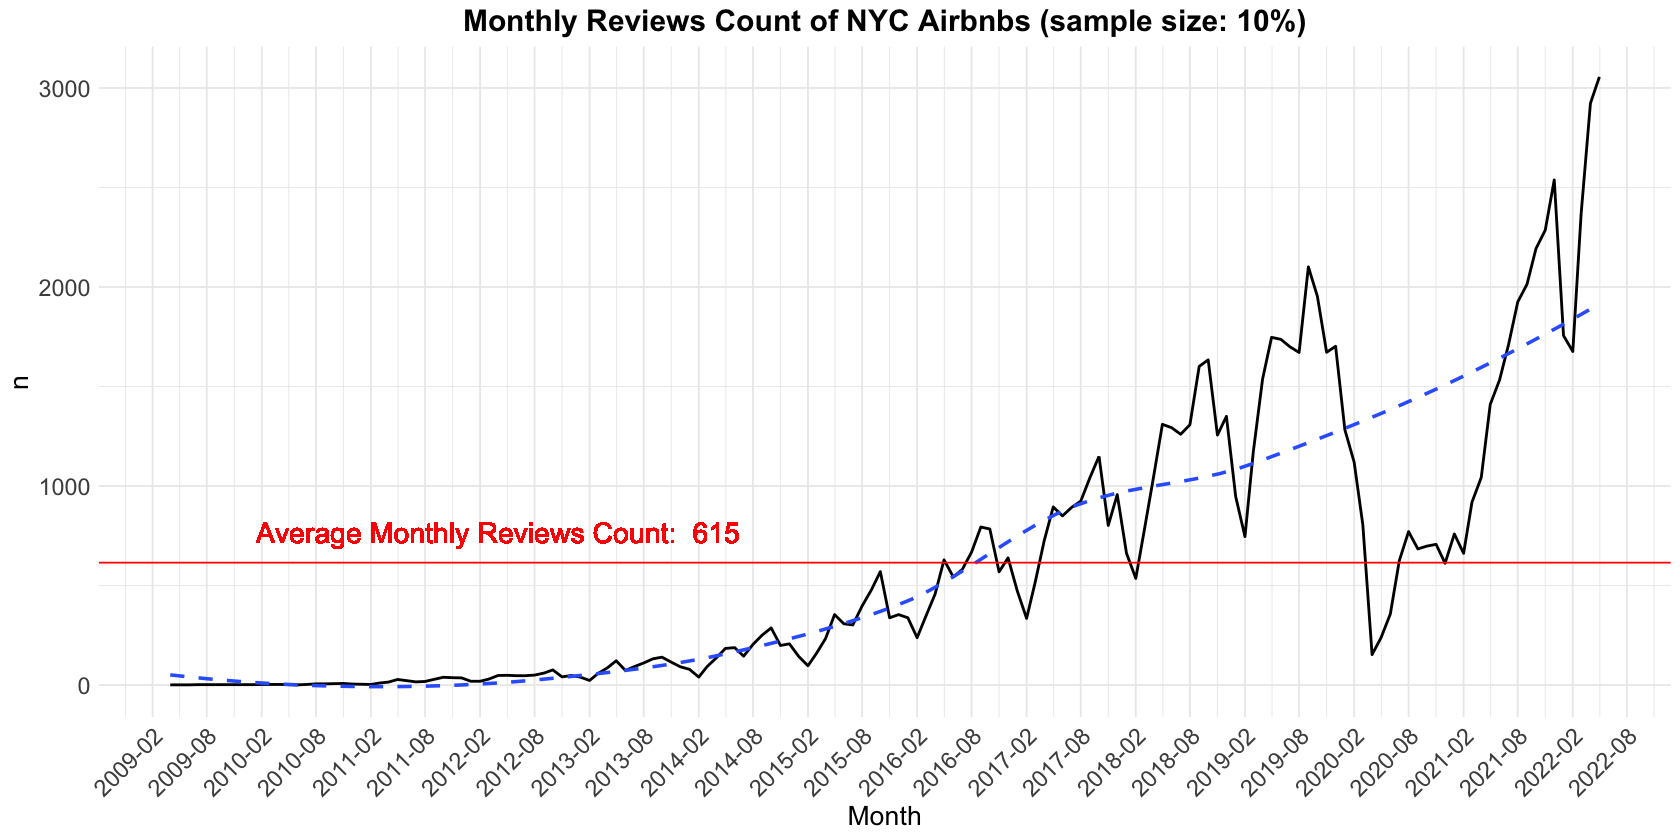

In [46]:
options(repr.plot.width = 14, repr.plot.height = 7)
df_date_group <- df_reviews %>%
  count(Month = round_date(date, "month"))

avg_review_cnt <- round(mean(df_date_group$n), 0)

df_date_group %>%
  ggplot(aes(Month, n)) +
  geom_line(size = 0.8) +
  geom_smooth(se = F, lty = 2) + 
  geom_hline(yintercept = avg_review_cnt, color="red") +
  geom_text(aes(ymd("2012-04-01"), avg_review_cnt), 
            label = paste("Average Monthly Reviews Count: ", avg_review_cnt),
            color="red", vjust = -1, size = 6) +
  scale_x_date(date_breaks="6 month", date_labels="%Y-%m") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Monthly Reviews Count of NYC Airbnbs (sample size: 10%)")

Overall, the number of reviews is affected by season and increases every year. During 2020/03 - 2021/05, the number of reviews dropped rapidly due to COVID 19 and has since increased rapidly.

## <a id="mining">5. Text Mining</a>

Is there any hidden relationships within those reviews? How does COVID 19 affect them? Let's explore the reviews by analyzing the popular words, [bigrams](https://en.wikipedia.org/wiki/Bigram) and [trigrams](https://en.wikipedia.org/wiki/Trigram), excluding stop words.

### <a id="words">5.1 Most common words</a>

#### English

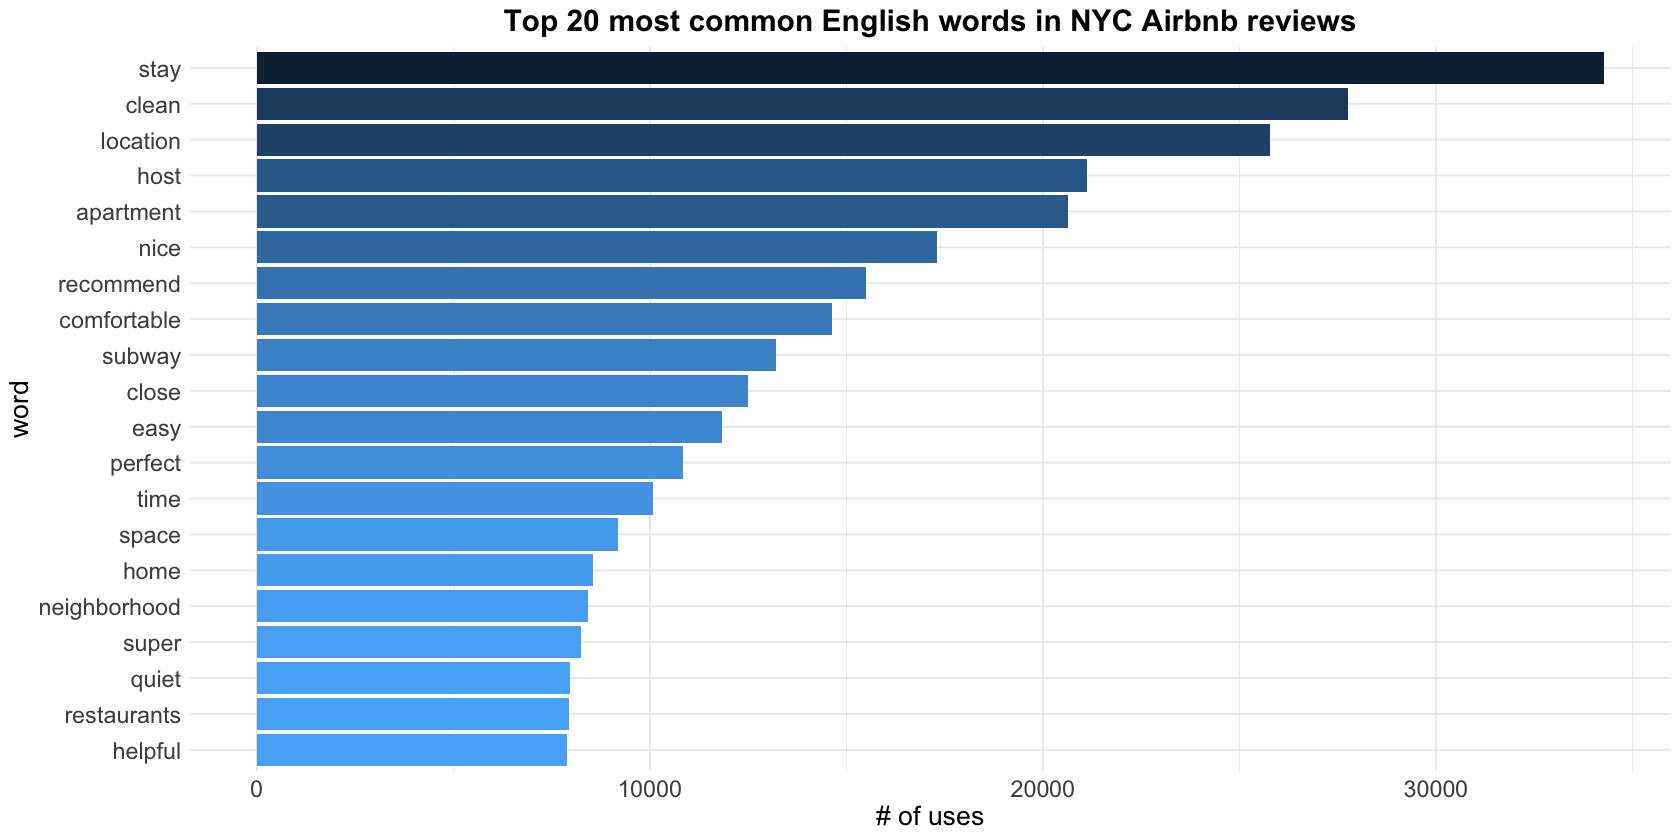

In [47]:
# add stop words of French and Spanish
# and custom stop words such as "br", "bien", "tres", "très", etc.
fr_stopwords <- tibble(word = stopwords("fr"), lexicon = c("custom"))
es_stopwords <- tibble(word = stopwords("es"), lexicon = c("custom"))
stop_words <- tibble(
    word = c("br", "bien", "tres", "très", "chez", "mucha", "muchas", "mucho", "muchos"), 
    lexicon = c("custom")
  ) %>% 
  bind_rows(es_stopwords) %>% 
  bind_rows(fr_stopwords) %>%
  bind_rows(tidytext::stop_words)

# English reviews
df_reviews_en <- df_reviews %>% 
  filter(language == "english")

# Spanish and French reviews
df_reviews_es_fr <- df_reviews %>% 
  filter(language %in% c("spanish", "french"))

words <- df_reviews_en %>%
  mutate(line_num = row_number()) %>% 
  unnest_tokens(word, reviews, drop = FALSE) %>%
  distinct(line_num, word, .keep_all = TRUE) %>%
  anti_join(stop_words, by = "word") %>% # ignore stop words 
  filter(str_detect(word, "[^\\d]")) %>% 
  group_by(word) %>%
  mutate(word_total = n()) %>%
  ungroup()

words %>%
    count(word, sort = TRUE) %>% 
    head(20) %>%
    mutate(word = reorder(word, n)) %>% 
    ggplot(aes(word, n, fill = -n)) +
    geom_col() +
    coord_flip() +
    theme(legend.position = "none") +
    labs(y = "# of uses", title = "Top 20 most common English words in NYC Airbnb reviews")

#### French and Spanish

Selecting by n


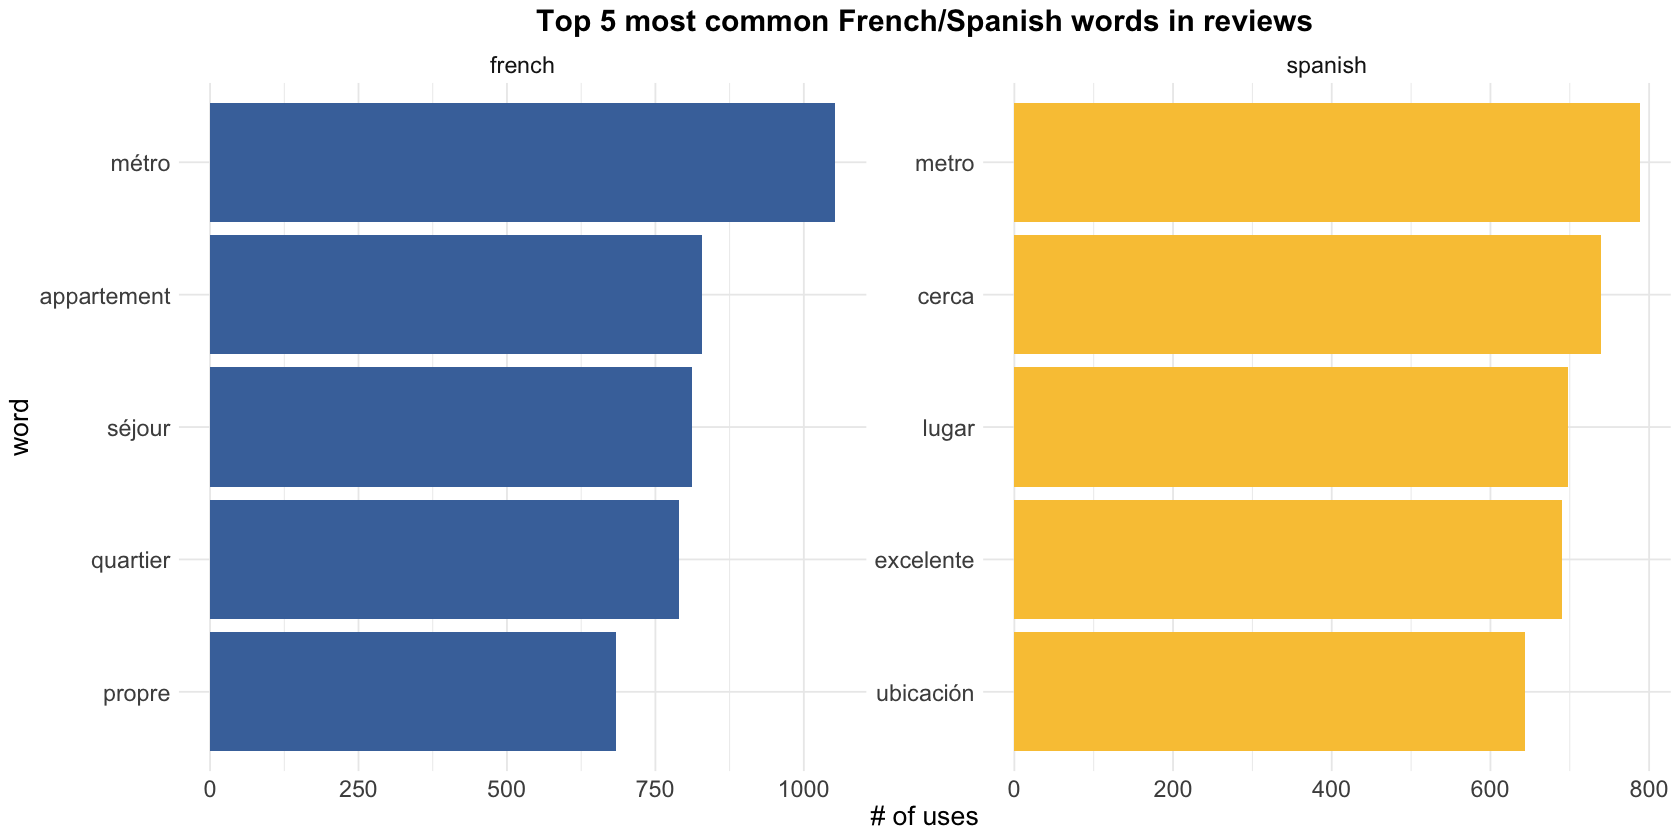

In [48]:
es_fr_words <- df_reviews_es_fr %>%
  mutate(line_num = row_number()) %>% 
  unnest_tokens(word, reviews, drop = FALSE) %>%
  distinct(line_num, word, .keep_all = TRUE) %>%
  anti_join(stop_words, by = "word") %>% # ignore stop words 
  filter(str_detect(word, "[^\\d]"))

es_fr_colors <- c("#4773aa", "#f9c642")

es_fr_words %>%
    count(language, word, sort = TRUE) %>% 
    group_by(language) %>%
    top_n(5) %>%
    mutate(word = reorder(word, n)) %>% 
    ggplot(aes(word, n, fill = language)) +
    scale_fill_manual(values = es_fr_colors) +
    geom_col() +
    coord_flip() +
    facet_wrap(~ language, scales = "free") + 
    theme(legend.position = "none") +
    labs(y = "# of uses", title = "Top 5 most common French/Spanish words in reviews")

In English, the 2nd to 5th popular words are "clean", "location", "host", and "apartment", they contain important information.

The top words in French are "subway", "apartment", "stay", "district", and "clean". In Spanish, they are "subway", "close", "place", "excellent", and "location".

A reasonable assumption is apartment is one of the most popular listing types in NYC Airbnb, and guests care most about the cleanliness, location (especially subway) and service the host provides. 

Let's continue our analysis and see if we can find evidence to support that assumption.

### <a id="words_trend">5.2 Important words trending in reviews</a>

#### English

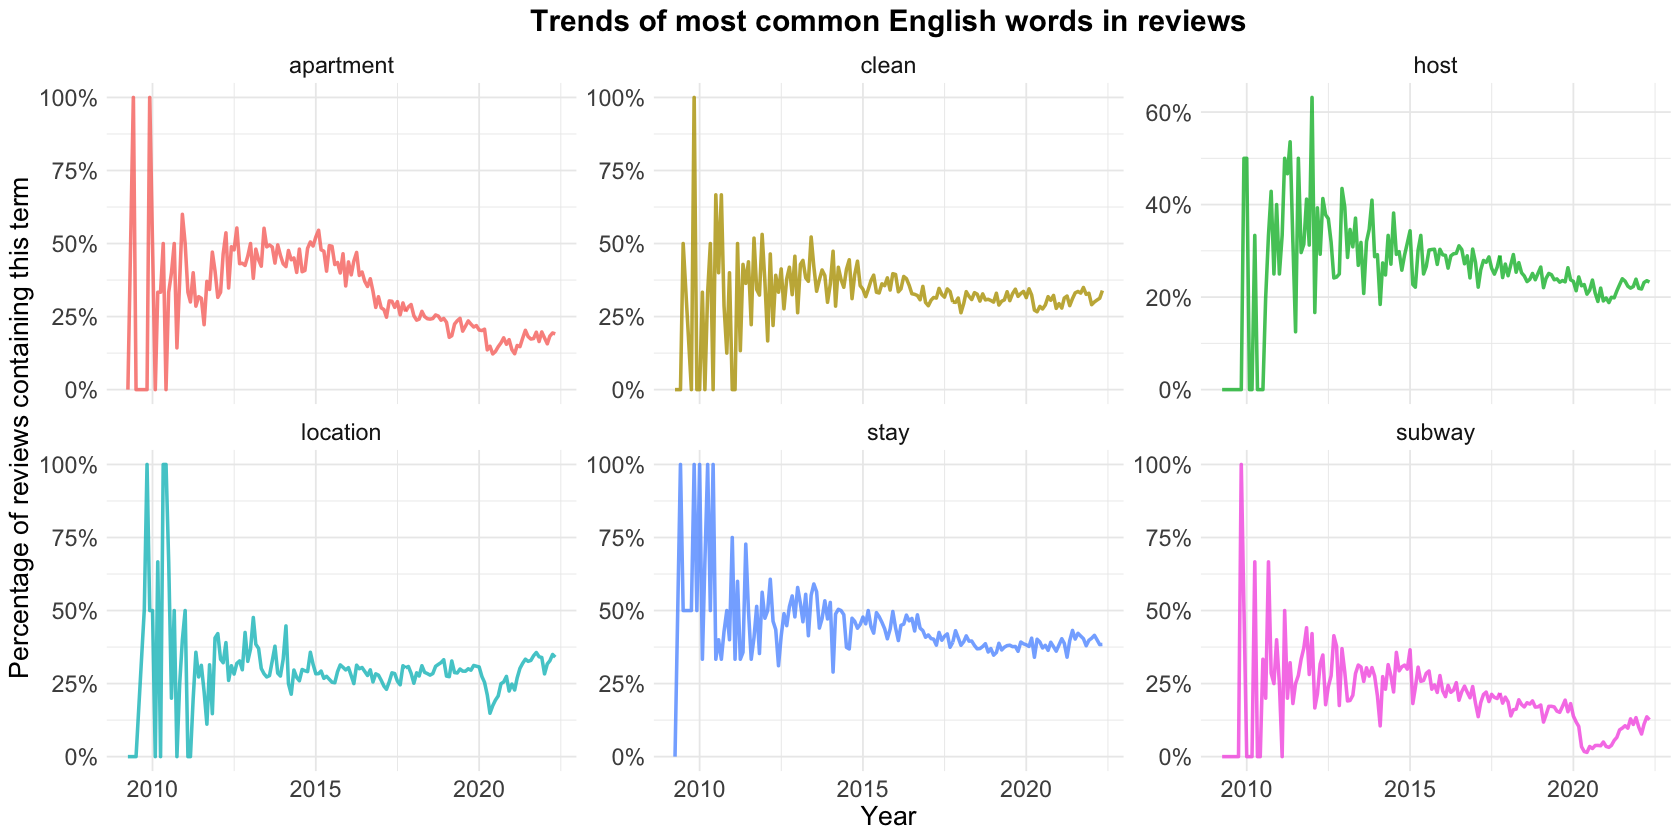

In [53]:
# create function to count word monthly percentage
count_monthly_word <- function (df, words) {
  reviews_per_month <- df %>%
    mutate(month = round_date(date, "month")) %>% 
    group_by(month) %>%
    summarize(month_total = n())

  word_month_counts <- words %>%
    mutate(month = round_date(date, "month")) %>% 
    count(word, month) %>%
    complete(word, month, fill = list(n = 0)) %>%
    inner_join(reviews_per_month, by = "month") %>%
    mutate(percent = n / month_total) %>%
    mutate(year = year(month) + yday(month) / 365) 
    
  return(word_month_counts)
}

# The top 5 most common words + "subway" (the most common words in French and Spanish)
imp_en_words <- c("stay", "clean", "location", "apartment", "host", "subway")

word_month_counts <- count_monthly_word(df_reviews_en, words)

word_month_counts %>%
  filter(word %in% imp_en_words) %>%
  ggplot(aes(month, n / month_total, color = word)) +
  geom_line(size = 1, alpha = .8) +
  scale_y_continuous(labels = percent_format()) +
  facet_wrap(~ word, scales = "free_y") +
  expand_limits(y = 0) +
  theme(legend.position = "none") +
  labs(x = "Year",
       y = "Percentage of reviews containing this term", 
       title = "Trends of most common English words in reviews")

The trends are not obvious before 2015, since then, the popularity of "location" is slowly increasing, "clean" is relatively stable, while the others are decreasing.

#### French and Spanish

Let's find out the trends of most common French/Spanish words.

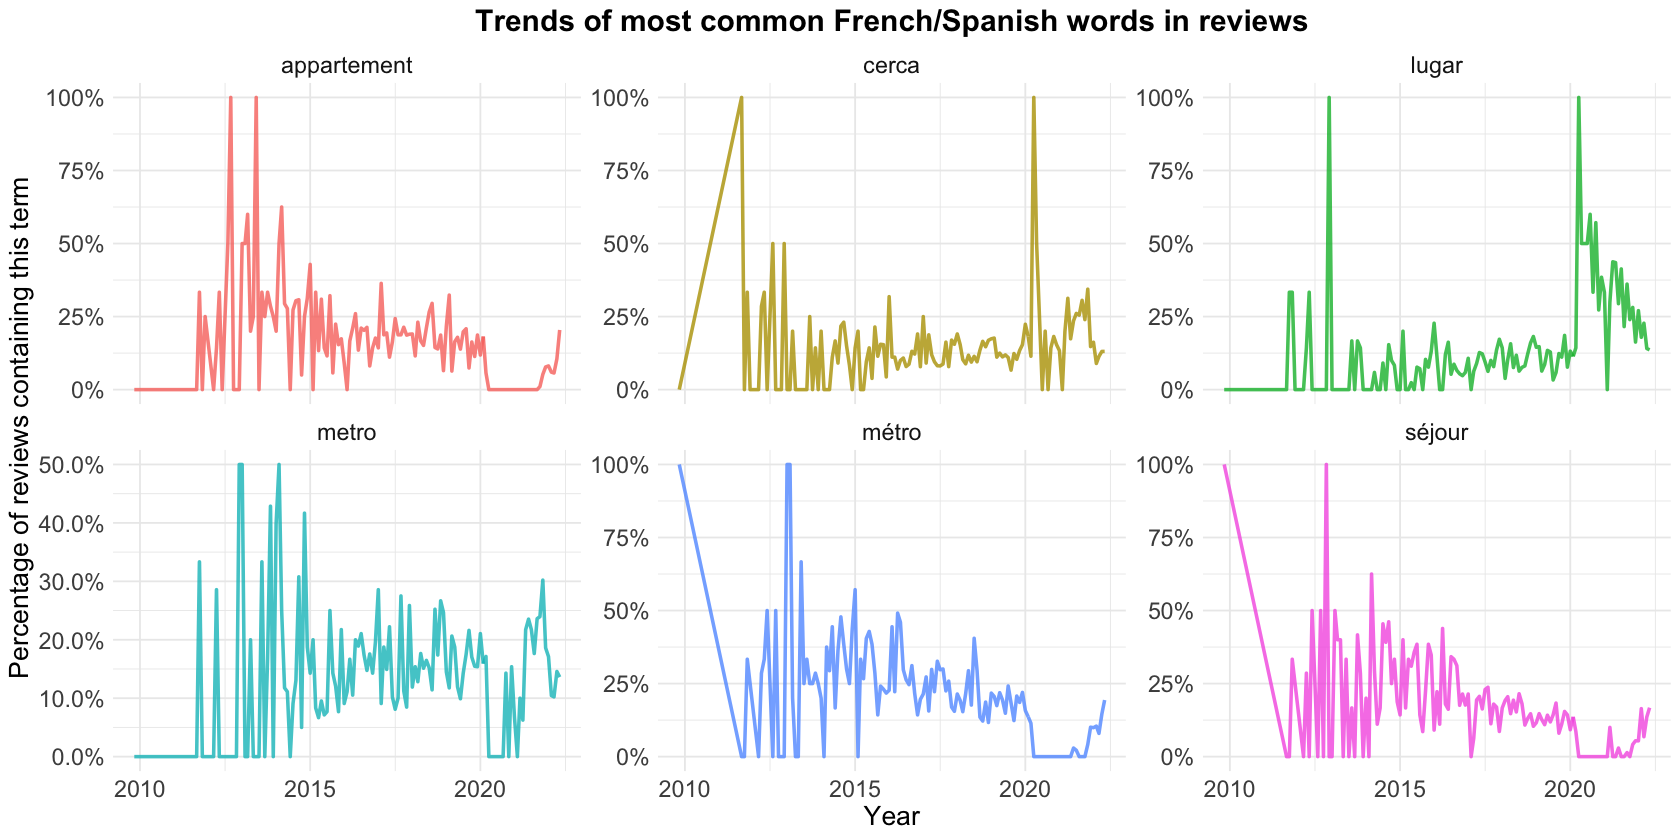

In [54]:
imp_es_fr_words <- c("métro", "appartement", "séjour", "metro", "cerca", "lugar")

word_month_counts_es_fr <- count_monthly_word(df_reviews_es_fr, es_fr_words)

word_month_counts_es_fr %>%
  filter(word %in% imp_es_fr_words) %>%
  ggplot(aes(month, n / month_total, color = word)) +
  geom_line(size = 1, alpha = .8) +
  scale_y_continuous(labels = percent_format()) +
  facet_wrap(~ word, scales = "free_y") +
  expand_limits(y = 0) +
  theme(legend.position = "none") +
  labs(x = "Year",
       y = "Percentage of reviews containing this term", 
       title = "Trends of most common French/Spanish words in reviews")

Trends of "cerca"("close" in English), "lugar" ("place" in English) and metro ("subway" in English) are increasing, while the others are still recovering from the shut down caused by COVID 19, which means COVID 19 affect more French guests than Spanish guests.

### <a id="bigrams">5.3 Bigrams</a>

#### English

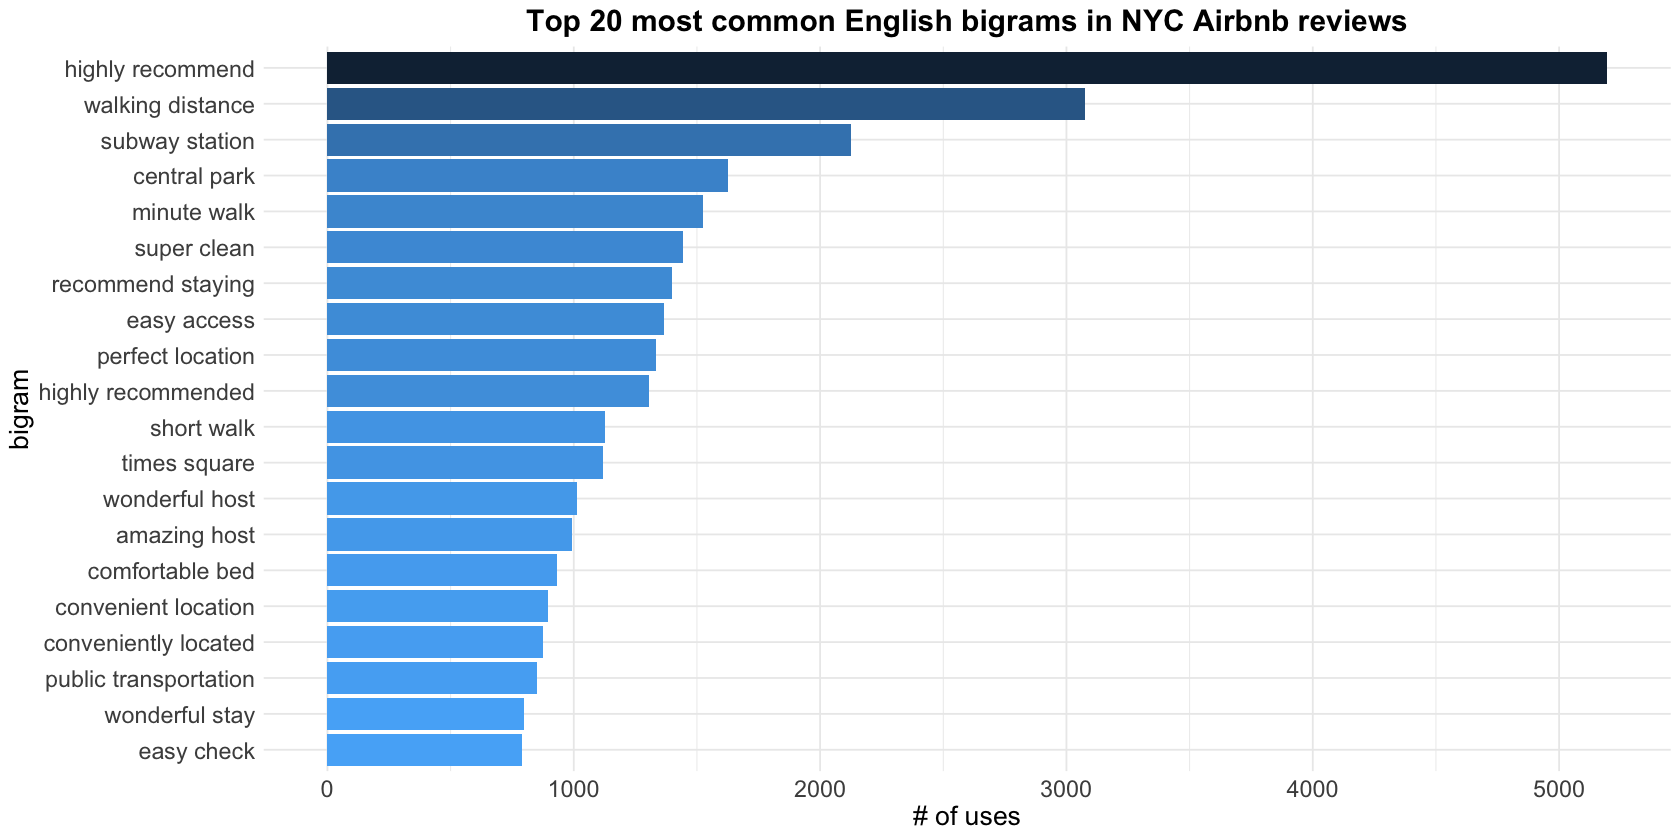

In [55]:
review_tokens <- df_reviews_en %>% 
  unnest_tokens(bigram, reviews, token = "ngrams", n = 2)

review_separated <- review_tokens %>% 
  separate(bigram, into = c("word1", "word2"), sep = " ")

review_bigrams <- review_separated %>% 
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word) %>% 
  unite(bigram, c(word1, word2), sep = " ")

review_bigrams %>%
  count(bigram, sort = TRUE) %>% 
  head(20) %>% 
  mutate(bigram = reorder(bigram, n)) %>%
  ggplot(aes(bigram, n, fill = -n)) +
  geom_col() +
  coord_flip() +
  theme(legend.position = "none") +
  labs(y = "# of uses", title = "Top 20 most common English bigrams in NYC Airbnb reviews")

Of those most common English bigrams, 10 of them are **location** related, such as "subway station", "central park", "perfect location", etc., Among accommodation-related words, **super clean** ranks much higher than "comfortable bed".
Moreover, both "amazing host" and "wonderful host" are compliments to the **host**.

That proves the importance of location, cleanliness and hosts.

#### French and Spanish

Selecting by n


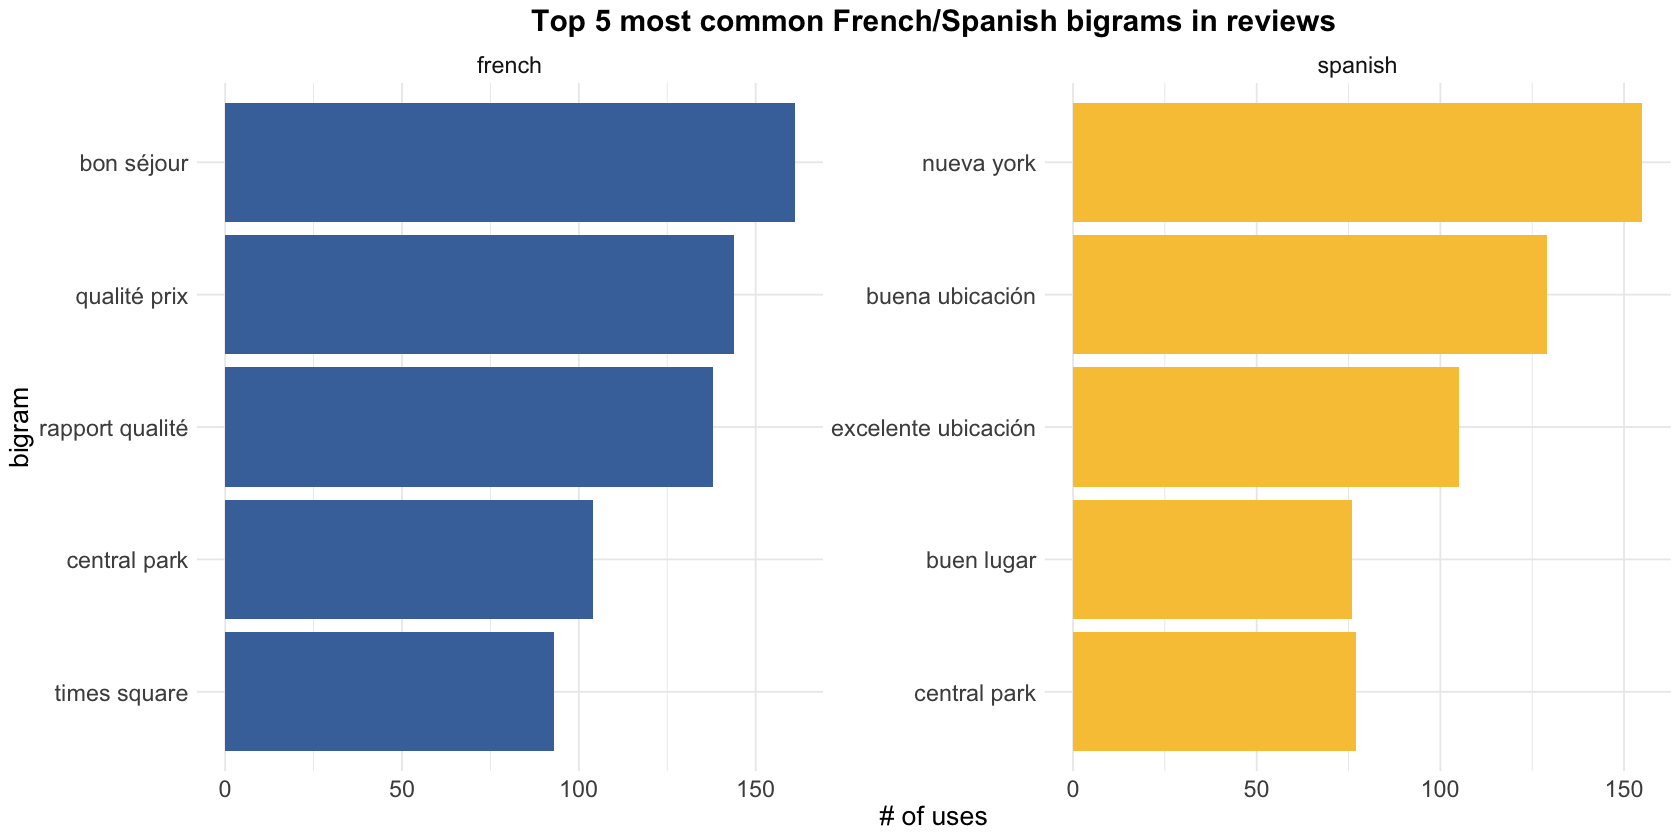

In [56]:
review_tokens_es_fr <- df_reviews_es_fr %>% 
  unnest_tokens(bigram, reviews, token = "ngrams", n = 2)

review_separated_es_fr <- review_tokens_es_fr %>% 
  separate(bigram, into = c("word1", "word2"), sep = " ")

review_bigrams_es_fr <- review_separated_es_fr %>% 
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word) %>% 
  unite(bigram, c(word1, word2), sep = " ")

review_bigrams_es_fr %>%
  count(language, bigram, sort = TRUE) %>% 
  group_by(language) %>%
  top_n(5) %>%
  mutate(bigram = reorder(bigram, n)) %>%
  ggplot(aes(bigram, n, fill = language)) +
  scale_fill_manual(values = es_fr_colors) +
  geom_col() +
  coord_flip() +
  facet_wrap(~ language, scales = "free") + 
  theme(legend.position = "none") +
  labs(y = "# of uses", title = "Top 5 most common French/Spanish bigrams in reviews")

7 of those French and Spanish bigrams are general compliments like "good stay", "excellent place", but they mentioned places like "central park", another location-related word.

### <a id="network">5.4 Bigrams network</a>

Since French and Spanish reviews are highly similar to English and in smaller size, next let's plot the network of English bigrams only. 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'can’t' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'can’t' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'can’t' in 'mbcsToSbcs': dot substituted for <99>”


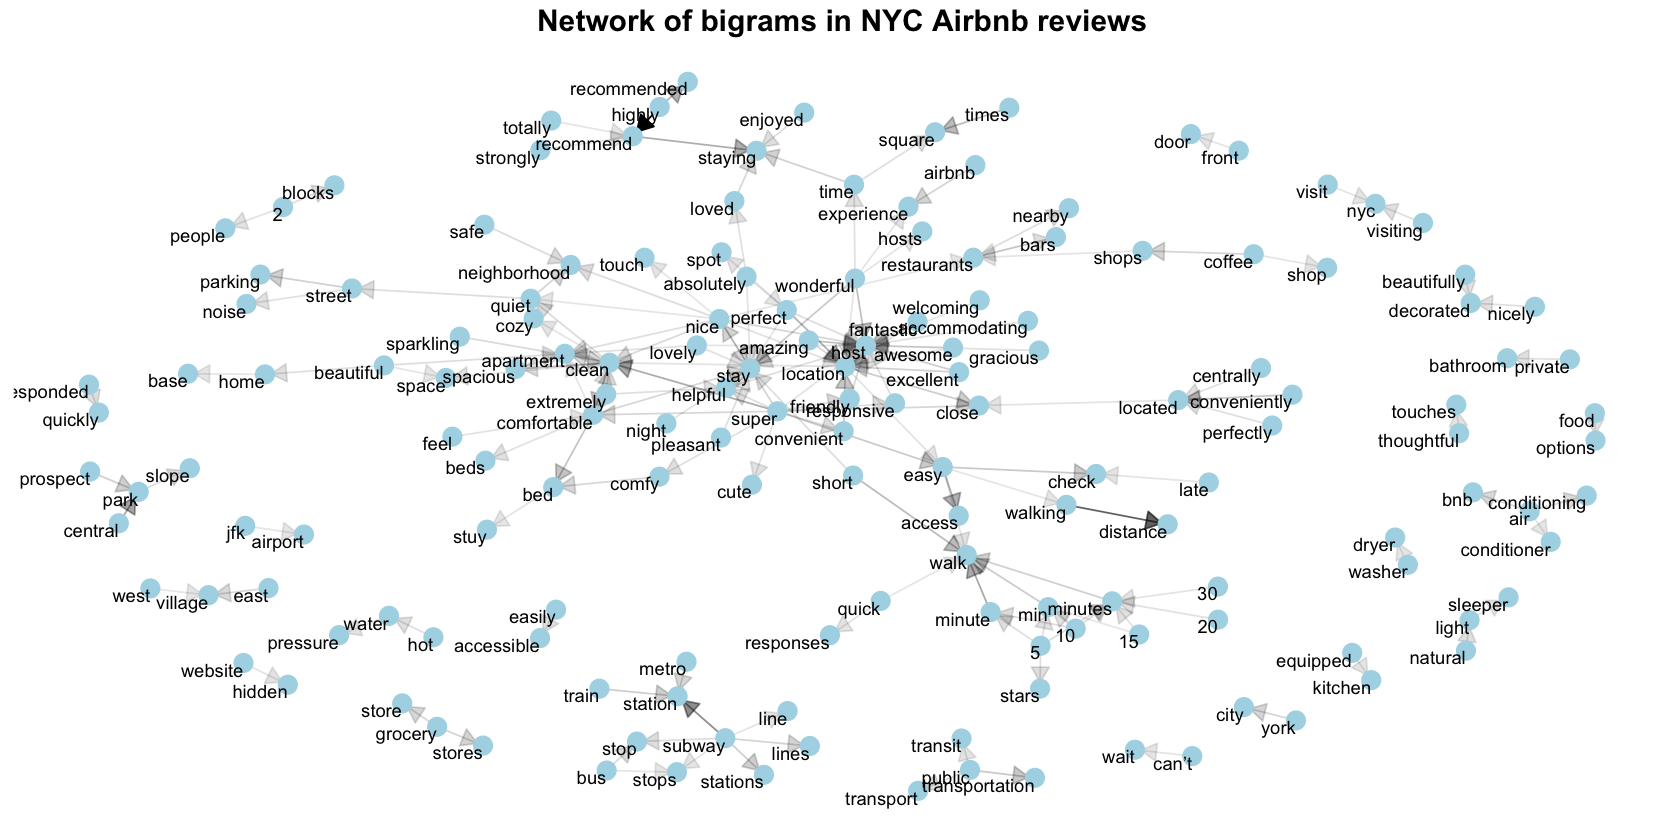

In [57]:
bigram_counts <- review_separated %>% 
  filter(!word1 %in% stop_words$word,
         !word2 %in% stop_words$word) %>% 
  count(word1, word2, sort = TRUE) 

bigram_graph <- bigram_counts %>% 
  filter(n >= 200) %>%
  as_tbl_graph()

arrow <- grid::arrow(type = "closed", length = unit(.15, "inches"))

ggraph(bigram_graph, layout = "fr") + 
  geom_edge_link(aes(alpha = n), show.legend = F, 
                 arrow = arrow, end_cap = circle(0.05, "inches")) + 
  geom_node_point(color = "lightblue", size = 5) + 
  geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
  labs(title = "Network of bigrams in NYC Airbnb reviews")

The graph shows popular bigrams that occur at least 200 times. According to the graph, words like "stay", "apartment", "location" and "host" have strong connections with many other words, but there is no clear clustering structure.

### <a id="trigrams">5.5 Trigrams</a>

#### English

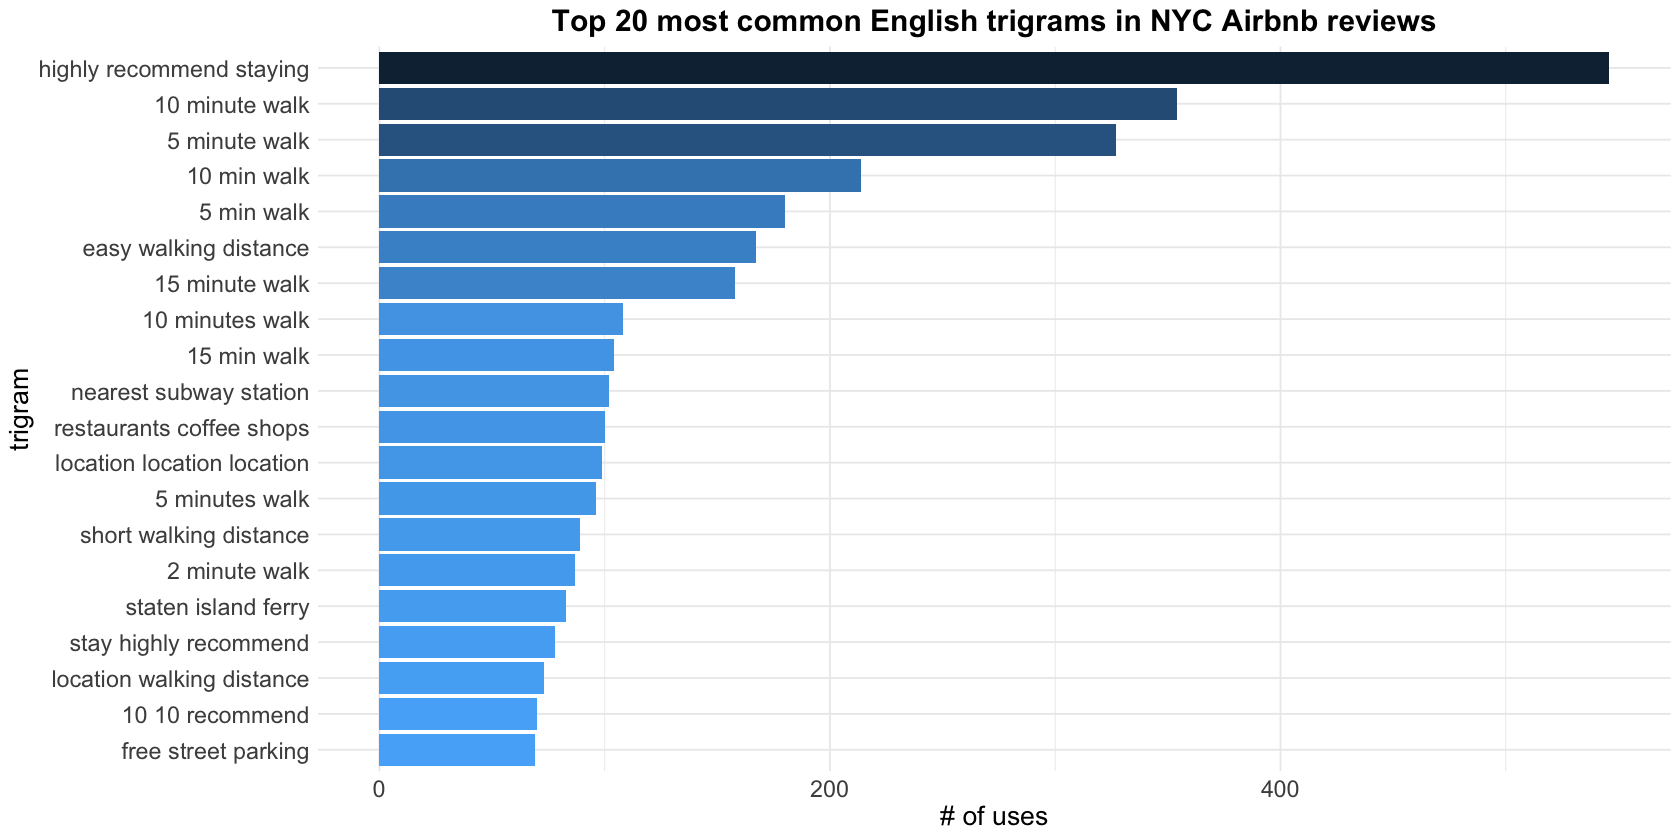

In [59]:
get_trigrams <- function(df) {
  review_tokens_tri <- df %>% 
    unnest_tokens(trigram, reviews, token = "ngrams", n = 3)

  review_separated_tri <- review_tokens_tri %>% 
    separate(trigram, into = c("word1", "word2", "word3"), sep = " ")

  review_trigrams <- review_separated_tri %>% 
    filter(!is.na(word1) & (!word1 %in% stop_words$word)) %>%
    filter(!is.na(word2) & (!word2 %in% stop_words$word)) %>%
    filter(!is.na(word3) & (!word3 %in% stop_words$word)) %>%
    unite(trigram, c(word1, word2, word3), sep = " ")
    
  return(review_trigrams)
}

review_trigrams_en <- get_trigrams(df_reviews_en)

review_trigrams_en %>%
  count(trigram, sort = TRUE) %>% 
  head(20) %>% 
  mutate(trigram = reorder(trigram, n)) %>%
  ggplot(aes(trigram, n, fill = -n)) +
  geom_col() +
  coord_flip() +
  theme(legend.position = "none") +
  labs(y = "# of uses", title = "Top 20 most common English trigrams in NYC Airbnb reviews")

English trigrams are heavily related to **minute walk**, it's also one of the most common bigrams.

#### French and Spanish

Selecting by n


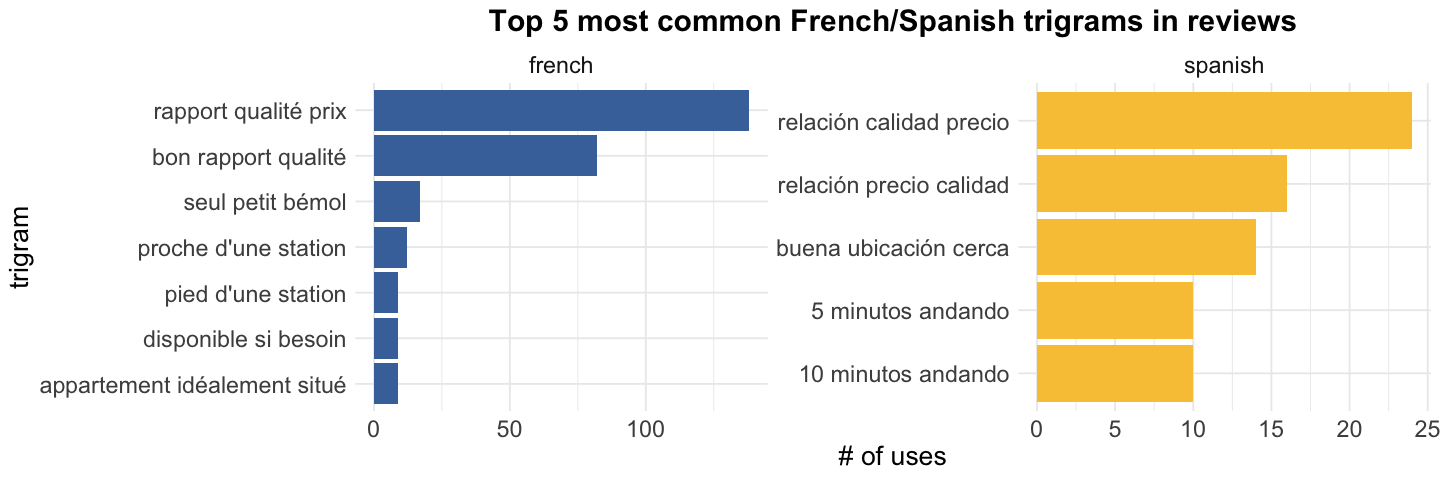

In [60]:
options(repr.plot.width = 12, repr.plot.height = 4)

review_trigrams_es_fr <- get_trigrams(df_reviews_es_fr)

review_trigrams_es_fr %>%
  count(language, trigram, sort = TRUE) %>% 
  group_by(language) %>%
  top_n(5) %>%
  mutate(trigram = reorder(trigram, n)) %>%
  ggplot(aes(trigram, n, fill = language)) +
  scale_fill_manual(values = es_fr_colors) +
  geom_col() +
  coord_flip() +
  facet_wrap(~ language, scales = "free") +
  theme(legend.position = "none") +
  labs(y = "# of uses", title = "Top 5 most common French/Spanish trigrams in reviews")

French/Spanish trigrams (the top 2 are "value for money" and "good value") are not as detailed as in English trigrams, but Spanish trigrams have "5/10 minutes walk" too, even though they occured just a few times.

### <a id="clouds">5.6 Word clouds</a>

The key phrase "minute walk"(and "min walk") show up in both common bigrams and trigrams, which indicates many reviewers walk and they care about the walking time. Let's visualize the walking starting and ending points by wordclouds.

#### Walking starting points

In [61]:
toks_en <- tokens(df_reviews_en$reviews)
# get sentences
kw_start_en <- kwic(toks_en, pattern = c(phrase("minute walk from*"), 
                                         phrase("min walk from*"),
                                         phrase("minutes walk from*"),
                                         phrase("mins walk from*")))

# group by start points
start_points <- kw_start_en %>% 
  unnest_tokens(word, post, drop = FALSE) %>% 
  anti_join(stop_words, by = "word") %>% 
  filter(str_detect(word, "[^\\d]")) %>% 
  count(word, sort = TRUE)

wordcloud2(start_points, rotateRatio = 0, widgetsize =c("700","350"))

HTML widgets cannot be represented in plain text (need html)

#### Walking ending points

In [62]:
# get sentences
kw_end_en <- kwic(toks_en, pattern = c(phrase("minute walk to*"), 
                                       phrase("min walk to*"),
                                       phrase("minutes walk to*"),
                                       phrase("mins walk to*")))

# group by end points
end_points <- kw_end_en %>% 
  unnest_tokens(word, post, drop = FALSE) %>% 
  anti_join(stop_words, by = "word") %>% 
  filter(str_detect(word, "[^\\d]")) %>% 
  count(word, sort = TRUE)

wordcloud2(end_points, rotateRatio = 0, widgetsize =c("700","350"))

HTML widgets cannot be represented in plain text (need html)

Walking from/to **subway** are most mentioned in reviews, followed by **train**. 

## <a id="sentiment">6. Sentiment Analysis</a>

Seems most common bigrams and trigrams in reviews are positive words, such as "highly recommended", does that mean most reviews are positive? What may cause negative reviews?
We can get the answers by sentiment analysis. 

First of all, let's find out the most positive and negative words, with the help of [AFINN lexicon](https://search.r-project.org/CRAN/refmans/textdata/html/lexicon_afinn.html).

### <a id="p_n_words">6.1 Positive and negative words</a>

#### English

Joining, by = "word"


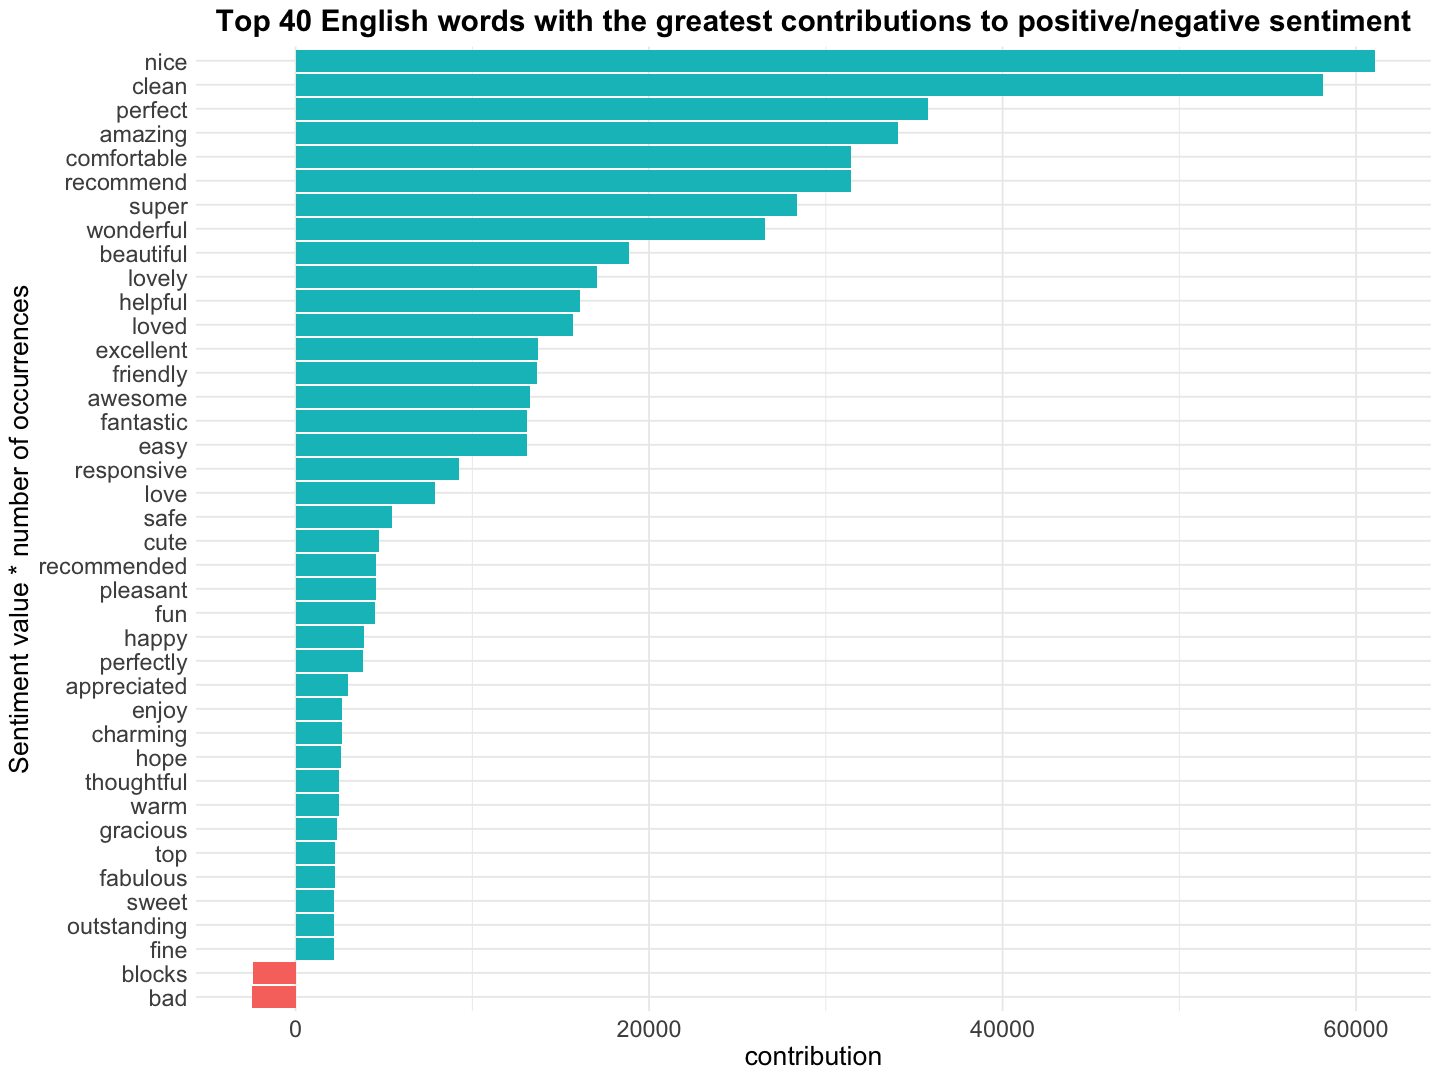

In [63]:
options(repr.plot.width = 12, repr.plot.height = 9)

words <- df_reviews_en %>%
  unnest_tokens(word, reviews) %>%
  anti_join(stop_words)

contributions <- words %>%
  inner_join(get_sentiments("afinn"), by = "word") %>%
  count(word, value) %>% 
  mutate(contribution = n * value)

contributions %>%
  top_n(40, abs(contribution)) %>%
  mutate(word = reorder(word, contribution)) %>%
  ggplot(aes(word, contribution, fill = contribution > 0)) +
  geom_col(show.legend = FALSE) +
  coord_flip() +
  labs(x = "Sentiment value * number of occurrences", title = "Top 40 English words with the greatest contributions to positive/negative sentiment")

When "blocks" is noun, it's no longer a negative word. So there is probably only one negative word "bad" in the top 40 words, and with small negative sentiment value.

#### French and Spanish

Joining, by = "word"


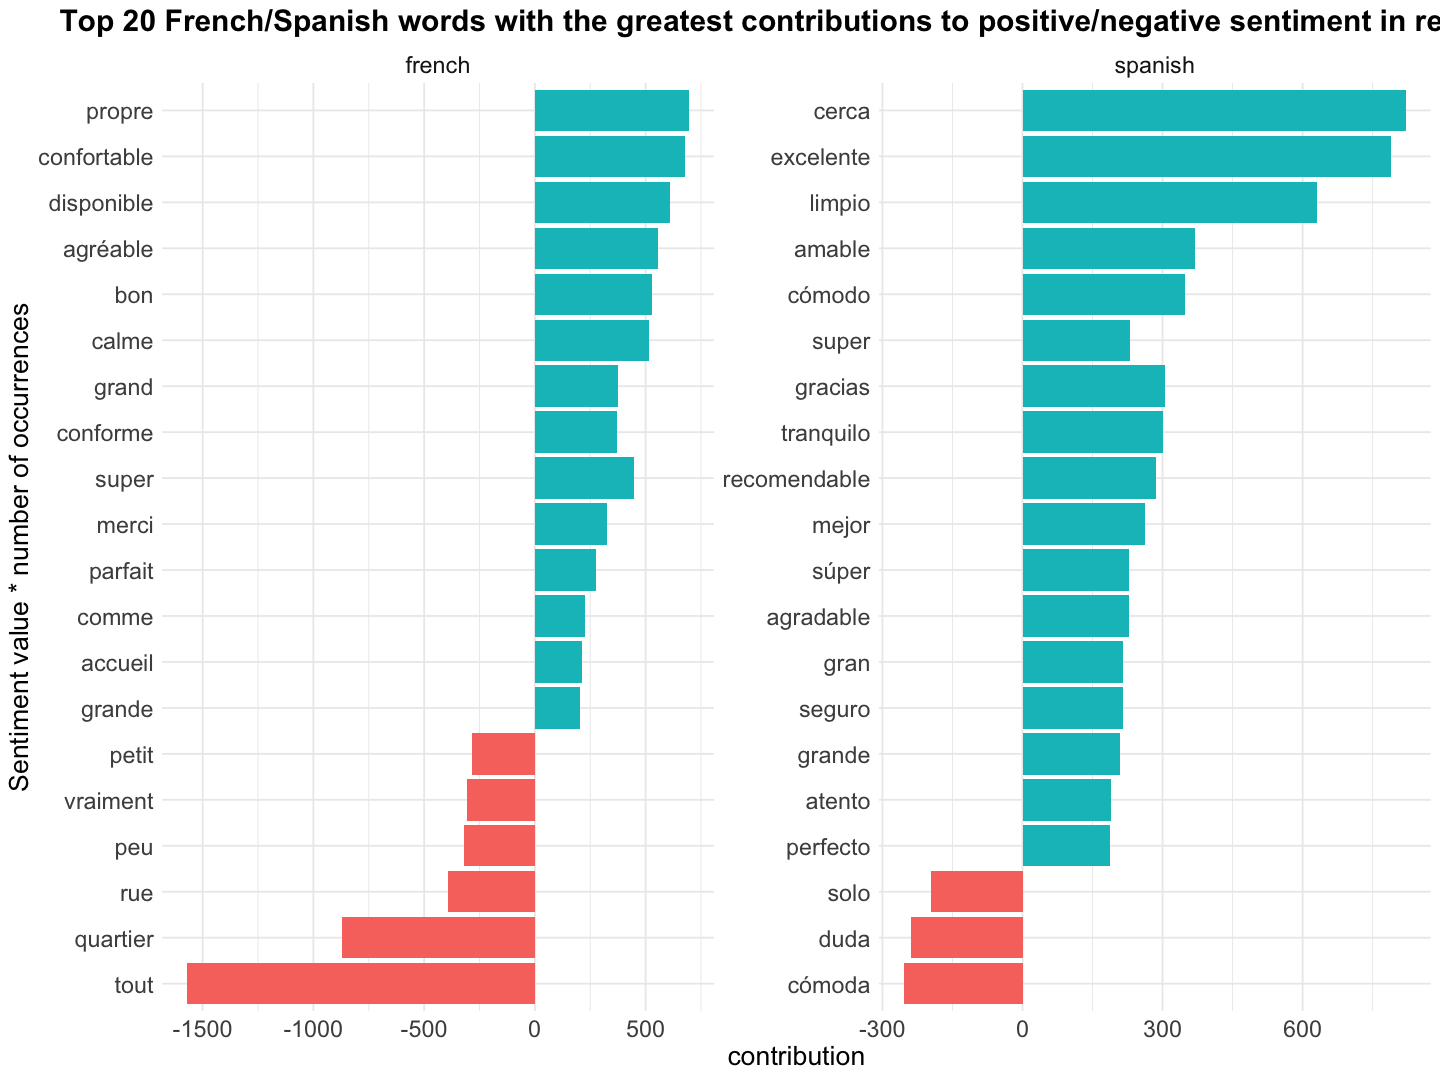

In [64]:
# get French/Spanish sentiment lexicon from Kaggle
# link: https://www.kaggle.com/datasets/rtatman/sentiment-lexicons-for-81-languages
es_lexicon <- read_csv("data/spanish-sentiments-lexicon.csv")
fr_lexicon <- read_csv("data/french-sentiments-lexicon.csv")

words_es_fr <- df_reviews_es_fr %>%
  unnest_tokens(word, reviews) %>%
  anti_join(stop_words)

es_contributions <- words_es_fr %>%
  inner_join(es_lexicon, by = "word")

fr_contributions <- words_es_fr %>%
  inner_join(fr_lexicon, by = "word")

es_fr_contributions <- es_contributions %>% 
  bind_rows(fr_contributions) %>% 
  count(language, word, value) %>% 
  mutate(contribution = n * value)

es_fr_contributions %>%
  group_by(language) %>% 
  top_n(20, abs(contribution)) %>%
  ungroup() %>% 
  mutate(word = reorder(word, contribution)) %>%
  ggplot(aes(word, contribution, fill = contribution > 0)) +
  geom_col(show.legend = FALSE) +
  coord_flip() +
  facet_wrap(~ language, scales = "free") +
  labs(x = "Sentiment value * number of occurrences", 
       title = "Top 20 French/Spanish words with the greatest contributions to positive/negative sentiment in reviews ")

The results of sentiment analysis highly depends on the accuracy of lexicons, however, the French and Spanish lexicons found online are not as reliable as the well-known AFINN lexicon, so we cannot gurantee the the result's accuracy of French and Spanish reviews, but overall, there are more positive words than negative ones, 

For instance, French word "tout" contributed most negative sentiment values, but it means "everything", is it a negative word?

Further more, another important question is what's the context of these words? For example, when a positive word is preceded by a negation word like "not", it will lead to neutral or even negative connotation.

### <a id="context">6.2 Context of positive/negative words</a>

Due to the smaller size of French and Spanish reviews, they are not as informative as English reviews. Therefore, from this section, we will focus on English reviews only. Let's pick 6 common words "don't", "no", "not", "nothing", "wasn't", "without" and check how often words are preceded by them.

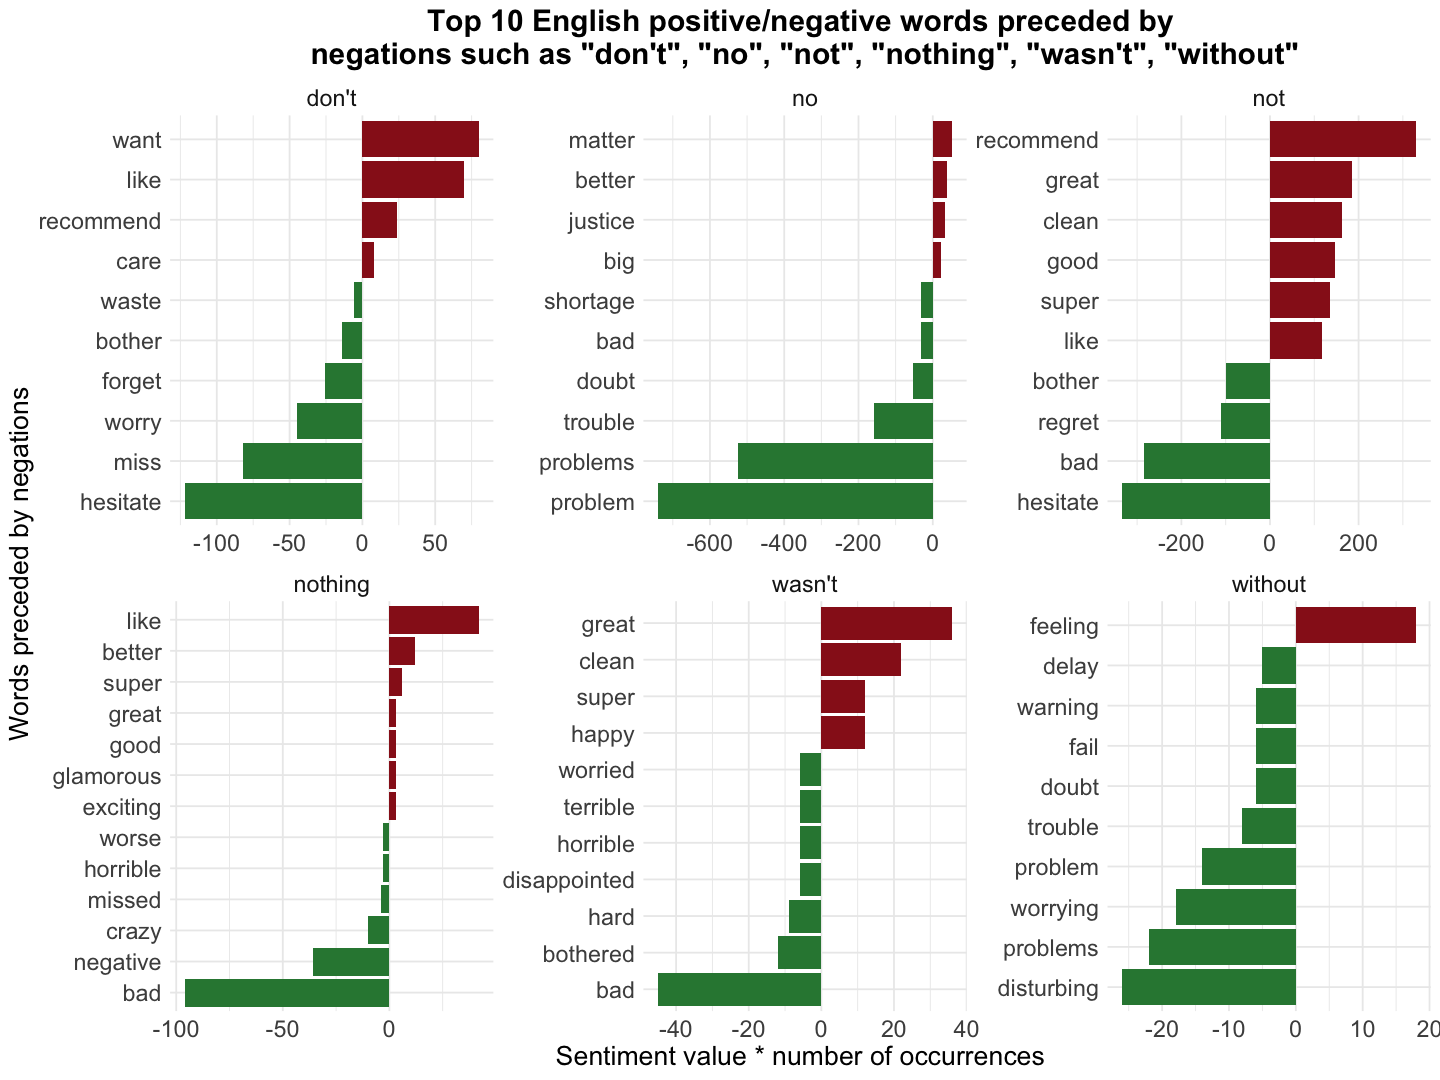

In [65]:
options(repr.plot.width = 12, repr.plot.height = 9)

rank_context_words <- function(data_separated, negation_words, n_rank, title) {
  negated_words <- data_separated %>%
    filter(word1 %in% negation_words) %>%
    inner_join(get_sentiments("afinn"), by = c(word2 = "word")) %>%
    count(word1, word2, value, sort = TRUE)

  p <- negated_words %>%
    mutate(contribution = n * value) %>%
    group_by(word1) %>% 
    top_n(n_rank, abs(contribution)) %>%
    ungroup() %>%
    ggplot(aes(y = reorder_within(word2, contribution, word1), 
               x = contribution, 
               fill = contribution > 0)) +
    scale_fill_manual(values = c("#2e8540", "#981b1e")) +
    geom_col(show.legend = FALSE) + 
    scale_y_reordered() + 
    facet_wrap(~ word1, scales = "free") + 
    theme(plot.title = element_text(size = 18)) +
    labs(title = title,
         y = "Words preceded by negations",
         x = "Sentiment value * number of occurrences")
    
  return(p)
}

negation_words <- c("wasn't", "no", "not", "nothing", "without", "don't")
rank_context_words(review_separated, negation_words, 10,
                   title = paste("Top 10 English positive/negative words preceded by\n",
                                 'negations such as "don\'t", "no", "not", "nothing", "wasn\'t", "without"'))

The bigrams **no problems** and **no problem** are the largest sources of misidentifying a word as negative, and the largest source of incorrectly classified positive sentiment is **not recommend**.

### <a id="link_negative">6.3 Words that are linked to negative words</a>

Why some reivews contain negative words? What disastified those reviewers? Let's use the [udpipe](https://bnosac.github.io/udpipe/docs/doc1.html) package to find out what words are are associated with those negative words.

In [66]:
# step 1: tokenizing
udpipe_tokens <- df_reviews_en %>% 
  rename(doc_id = id, text = reviews) %>%
  udpipe("english-gum")

In [67]:
# get lexicons
load(url("https://github.com/SentometricsResearch/sentometrics/blob/master/data-raw/FEEL_eng_tr.rda?raw=true"))
load(url("https://github.com/SentometricsResearch/sentometrics/blob/master/data-raw/valence-raw/valShifters.rda?raw=true"))

polarity_terms <- rename(FEEL_eng_tr, term = x, polarity = y)
polarity_negators <- subset(valShifters$valence_en, t == 1)$x
polarity_amplifiers <- subset(valShifters$valence_en, t == 2)$x
polarity_deamplifiers <- subset(valShifters$valence_en, t == 3)$x

# step 2: starting sentiment analysis
sentiments <- txt_sentiment(udpipe_tokens, term = "lemma", 
                            polarity_terms = polarity_terms,
                            polarity_negators = polarity_negators, 
                            polarity_amplifiers = polarity_amplifiers,
                            polarity_deamplifiers = polarity_deamplifiers)
sentiments <- sentiments$data

# step 3: get reasons (token_parent and lemma_parent) of negative words
reasons <- sentiments %>% 
  cbind_dependencies() %>%
  select(doc_id, lemma, token, upos, sentiment_polarity, token_parent, lemma_parent, upos_parent, dep_rel) %>%
  filter(sentiment_polarity < 0)

`summarise()` has grouped output by 'lemma'. You can override using the
`.groups` argument.
Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


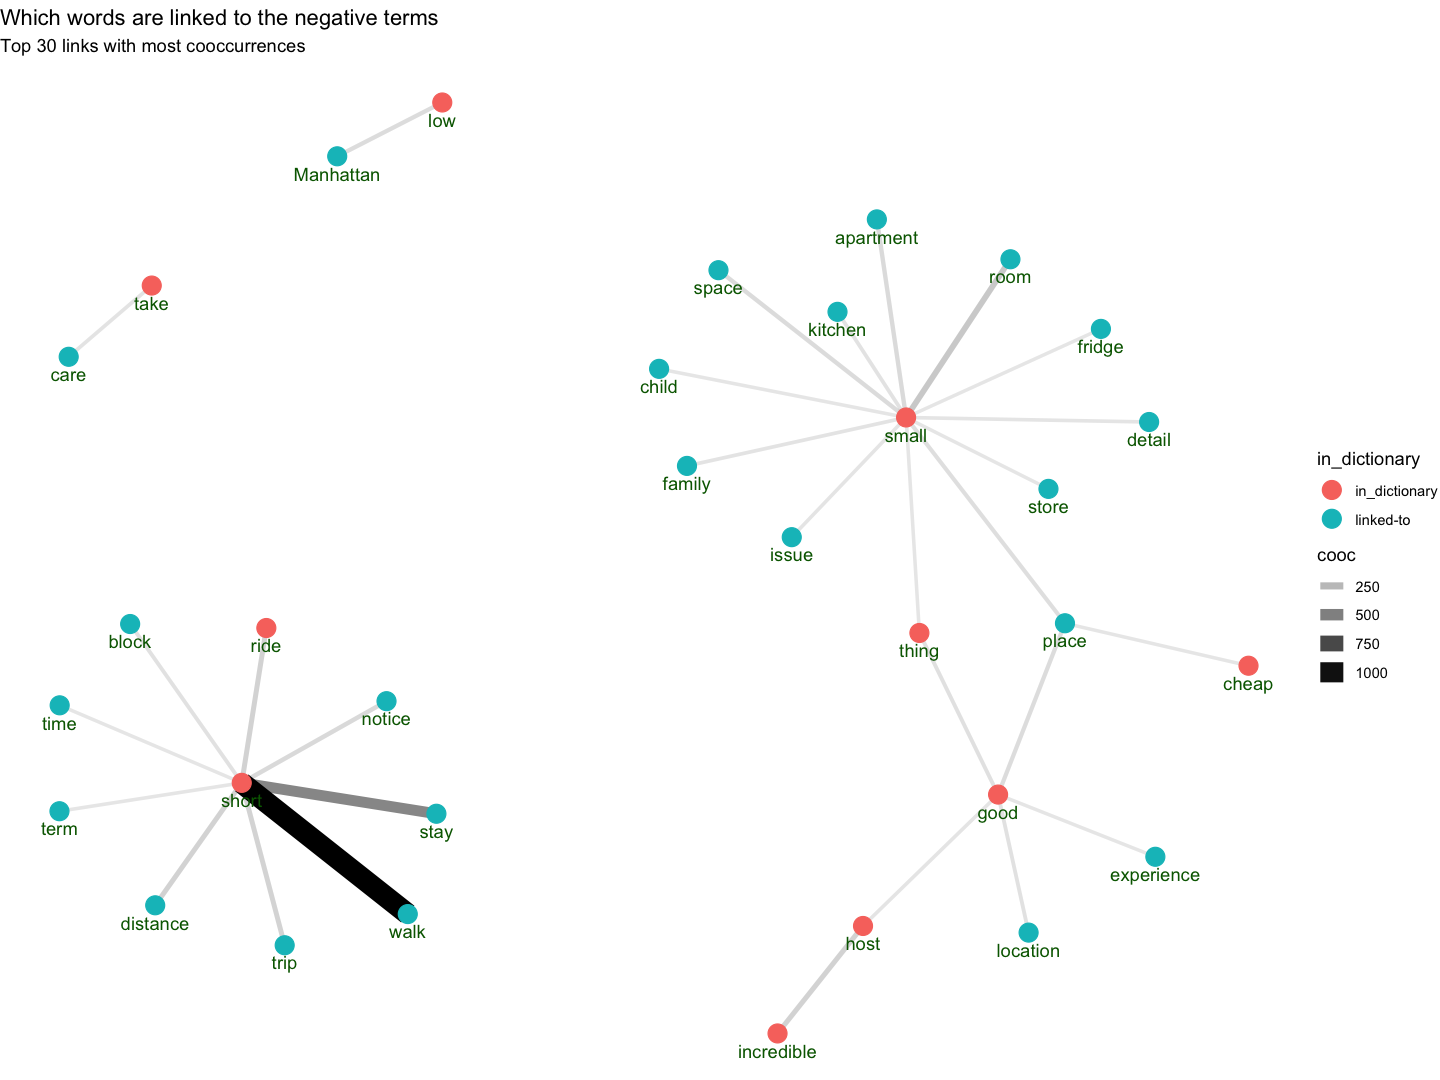

In [68]:
plot_negative_network <- function(reasons) {
# group by negative words and parent words
# amod: adjectival phrase that serves to modify the noun
reasons_filtered <- filter(reasons, dep_rel %in% "amod") 
word_cooccurences <- reasons_filtered %>% 
  group_by(lemma, lemma_parent) %>%
  summarise(cooc = n()) %>%
  arrange(-cooc) %>% 
  ungroup()

# distinguish negative words from parent words
vertices <- bind_rows(
  data_frame(key = unique(reasons_filtered$lemma)) %>% 
    mutate(in_dictionary = if_else(key %in% polarity_terms$term, 
                                   "in_dictionary", "linked-to")),
  data_frame(key = unique(setdiff(reasons_filtered$lemma_parent, reasons_filtered$lemma))) %>% 
    mutate(in_dictionary = "linked-to"))

# visualization of top 30 pairs of negative words and parent words
cooc <- head(word_cooccurences, 30)
set.seed(1)
cooc %>%  
  graph_from_data_frame(vertices = filter(vertices, key %in% c(cooc$lemma, cooc$lemma_parent))) %>%
  ggraph(layout = "fr") +
  geom_edge_link0(aes(edge_alpha = cooc, edge_width = cooc)) +
  geom_node_point(aes(colour = in_dictionary), size = 5) +
  geom_node_text(aes(label = name), vjust = 1.8, col = "darkgreen") +
  labs(title = "Which words are linked to the negative terms",
      subtitle = "Top 30 links with most cooccurrences") +
  theme_void()       
}

plot_negative_network(reasons)

According to the graph above, "short walk" has the strongest co-occurrence as negative words as "short" in `polarity_terms` has negative score, however, according to what we've learned, "short walk/distance/trip" is positive.

Similarly, "incredible host" is also positive and "low manhattan" is a noun. We need to filter out those words to get more accurate network graph.

`summarise()` has grouped output by 'lemma'. You can override using the
`.groups` argument.


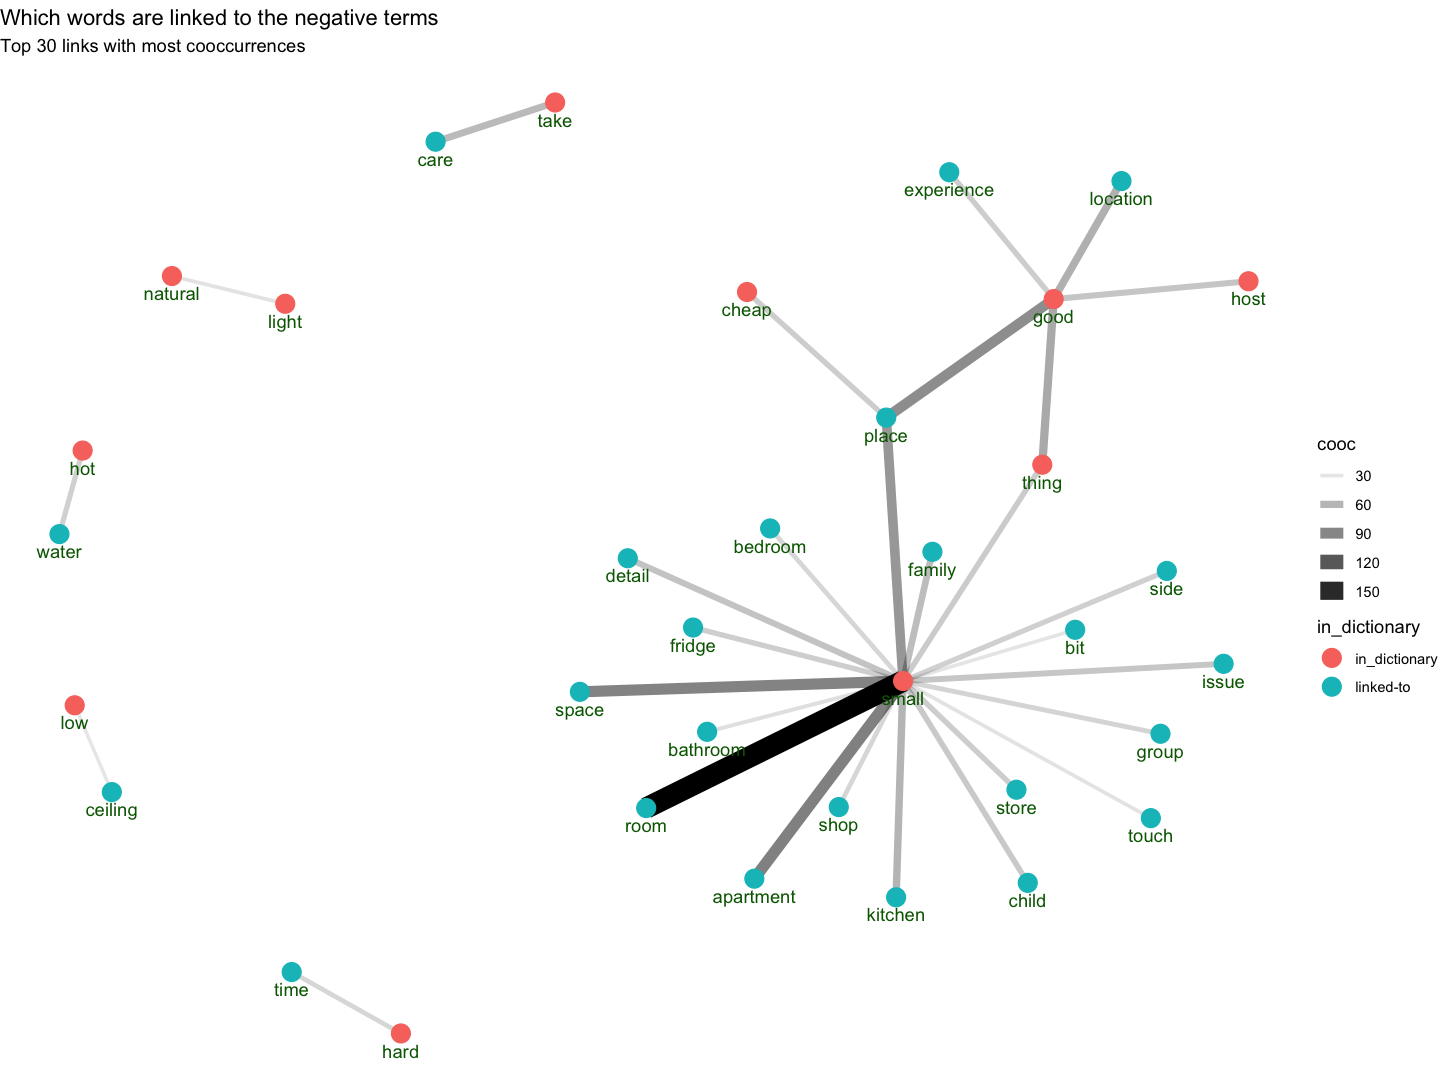

In [70]:
# filter out words that misindentified as negative
reasons_filtered <- reasons %>%
  filter(!token %in% c("short", "incredible")
         & token_parent != "Manhattan")

plot_negative_network(reasons_filtered)

This time, we did find something meaningful from the graph above. **small room** is the biggest reason of negative reviews, followed by small apartment/space and good place (from reviewers who might don't agree it's a good place). Besides, Airbnb hosts might also need to take care of issues such as **hot water** and **natural light**. 

### <a id="emotions">6.4 Emotions</a>

We can get sentiment scores of reviews based on the [
NRC Word-Emotion Association Lexicon](http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm), which provides a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive).

Joining, by = "word"


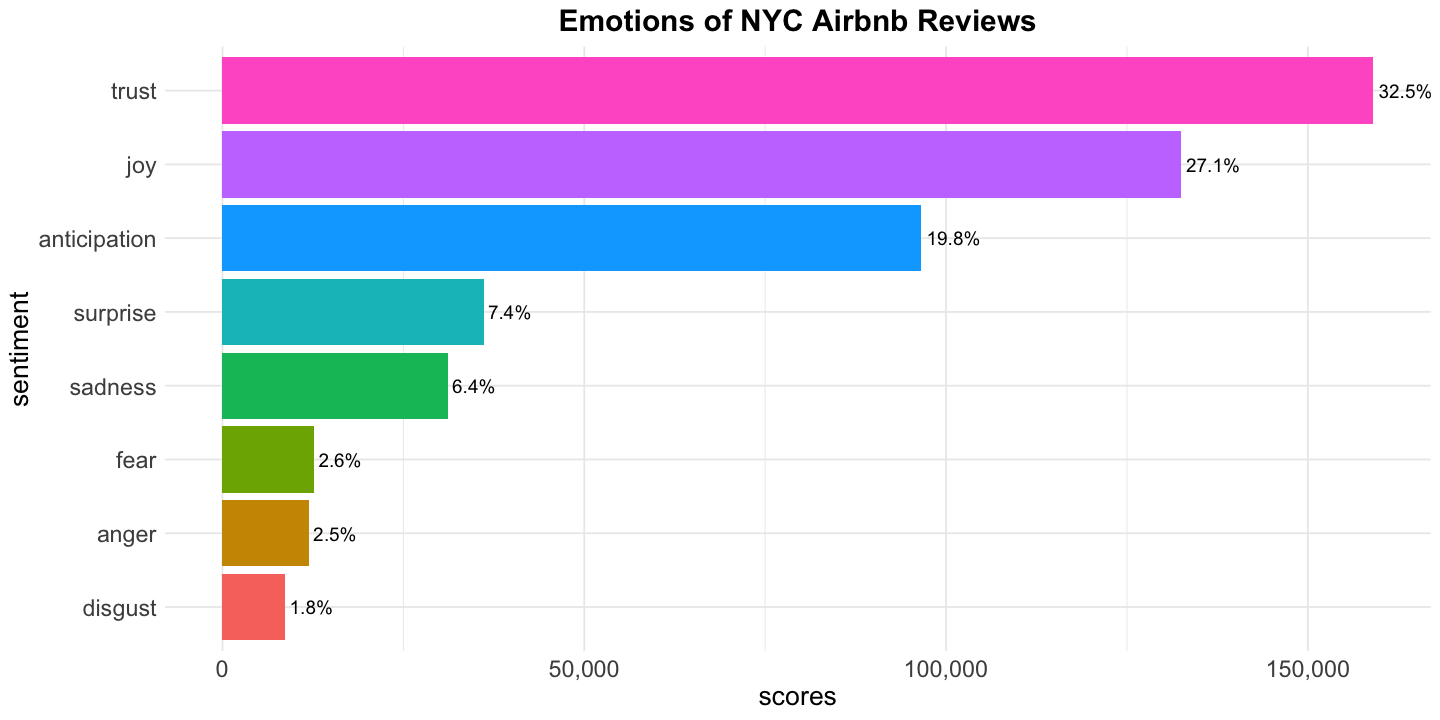

In [80]:
options(repr.plot.width = 12, repr.plot.height = 6)

# download the lexicon from http://saifmohammad.com/WebDocs/Lexicons/NRC-Emotion-Lexicon.zip
# save it to data folder
words_nrc <- words %>%
  left_join(textdata::lexicon_nrc(dir="data", delete=TRUE, manual_download = TRUE)) %>% 
  filter(!is.na(sentiment))

words_emotions <- words_nrc %>% filter(!sentiment %in% c("positive", "negative"))

words_sentiments <- words_nrc %>% filter(sentiment %in% c("positive", "negative"))

barplot_sentiment <- function(df, title) {
  df %>%
    count(sentiment) %>%
    arrange(desc(n)) %>% 
    mutate(sentiment = reorder(sentiment, n), 
           pct = n/sum(n), 
           label = paste0(round(pct * 100, 1), "%")) %>% 
    rename(scores = n) %>% 
    ggplot(aes(x = sentiment, y = scores, fill = sentiment, label = label)) +
    geom_col(position = 'dodge') +
    coord_flip() +
    scale_y_continuous(labels = scales::comma) +
    geom_text(position = position_dodge(width = .9),
              vjust = 0.5,
              hjust = -0.1,
              size = 4) +
    theme(legend.position="none") +
    labs(title = title)    
}

barplot_sentiment(words_emotions, "Emotions of NYC Airbnb Reviews")

The top 3 sentiment/emotions are **positive**, **trust**, and **joy**, what about the positive and negative valence?

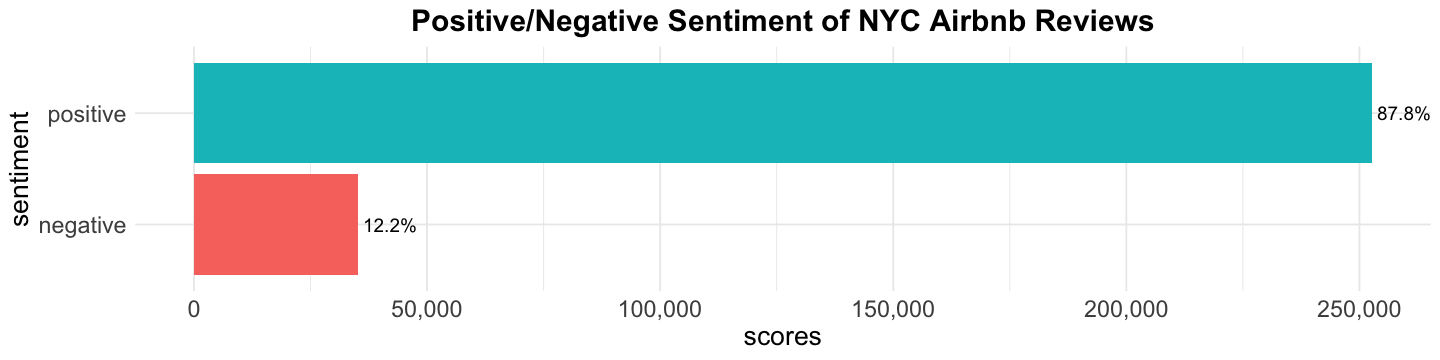

In [85]:
options(repr.plot.width = 12, repr.plot.height = 3)

barplot_sentiment(words_sentiments, "Positive/Negative Sentiment of NYC Airbnb Reviews")

Positive scores are much higher than negative scores.

## <a id="conclusions">7. Conclusions</a>

In this project, we walk through a step-by-step introduction to text mining and sentiment analysis of NYC, Airbnb reviews, and found something interesting:

- The main languages are **English** (90.1%), **Spanish** (3.1%), and **French** (2.6%).
- Reviews are more **positive** (87.8%) than negative (12.2%), the strongest emotions of reviews are **Trust** and **Joy**.
- The **location** of the listing is very important to guests, they care about the **walking distance** to **subway station**, and most often mentioned **5-10 minute walk**.
- Negative reviews are strongly associated with limited space, such as **small room** and **small apartment**, followed by not good location.